In [1]:
import pandas as pd
import torch
from torchvision import transforms
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration, AutoTokenizer, AutoModelForSeq2SeqLM
import numpy as np

In [2]:
df = pd.read_csv("mydata.csv")
df.head()


dish_id         dish_name category   cuisine_type difficulty  \
0        1    Chocolate Cake  Dessert  International     Medium   
1        2             Momos    Asian          Asian     Medium   
2        3  Chicken Tandoori   Indian          Asian     Medium   
3        4           Biryani   Indian          Asian       Hard   
4        5             Pizza  Italian       European     Medium   

   prep_time_minutes  cook_time_minutes  total_time_minutes  servings  \
0                 20                 35                  55        12   
1                 45                 12                  57        25   
2                 15                 25                  40         8   
3                 45                 60                 105         6   
4                 20                 15                  35         4   

                                         ingredients  \
0  All-purpose flour:1¾ cups;Sugar:2 cups;Cocoa p...   
1  All-purpose flour:2 cups;Water:⅓ cup;Salt:½ ts...   
2  Chicken quarters:2 lbs;Plain yogurt:1 cup;Ging...   
3  Pilao rice:300g;Chicken:500g, chopped into pie...   
4  Pizza dough:1 ball;Pizza sauce:¼ cup;Mozzarell...   

                                        recipe_steps  \
0  Preheat oven to 350°F (175°C) and grease two 9...   
1  Make dough by mixing flour, salt and lukewarm ...   
2  Preheat oven to 400°F (200°C);In a mixing bowl...   
3  Soak rice in water while preparing other ingre...   
4  Preheat oven to 475°F (245°C);Roll out pizza d...   

                                             image_1  \
0  https://t3.ftcdn.net/jpg/02/10/14/94/360_F_210...   
1  https://images.squarespace-cdn.com/content/v1/...   
2  https://t3.ftcdn.net/jpg/04/68/93/94/360_F_468...   
3  https://assets.cntraveller.in/photos/6218cfdbd...   
4  https://thumbs.dreamstime.com/b/pizza-rustic-i...   

                                             image_2  \
0  https://www.shutterstock.com/image-photo/choco...   
1  https://t3.ftcdn.net/jpg/09/70/22/44/360_F_970...   
2  https://www.yummytummyaarthi.com/wp-content/up...   
3  https://t3.ftcdn.net/jpg/01/14/51/60/360_F_114...   
4  https://marketplace.canva.com/MADapg-tRrc/1/th...   

                                             image_3  \
0  https://prettysimplesweet.com/wp-content/uploa...   
1  https://t3.ftcdn.net/jpg/03/98/52/84/360_F_398...   
2  https://i0.wp.com/www.happyandharried.com/wp-c...   
3  https://t3.ftcdn.net/jpg/05/66/68/36/360_F_566...   
4  https://i.pinimg.com/736x/f9/6b/d8/f96bd8d65e3...   

              calories_per_serving  \
0     dessert;chocolate;cake;sweet   
1  asian;steamed;dumplings;chicken   
2     indian;spicy;grilled;chicken   
3       indian;rice;spicy;aromatic   
4     italian;cheese;baked;comfort   

                                           protein_g  carbs_g  fat_g  tags  \
0  A rich and moist chocolate cake perfect for ce...      NaN    NaN   NaN   
1  Traditional Asian dumplings with thin wrapper ...      NaN    NaN   NaN   
2  Authentic Indian grilled chicken marinated in ...      NaN    NaN   NaN   
3  Fragrant layered rice dish with tender spiced ...      NaN    NaN   NaN   
4  Classic Italian flatbread topped with cheese a...      NaN    NaN   NaN   

   description  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [3]:
df = df.drop(columns=["dish_id", "difficulty", "prep_time_minutes", "cook_time_minutes", "total_time_minutes", "servings"])


In [4]:
df.head()
df = df.drop(columns=["calories_per_serving","protein_g","carbs_g","fat_g","tags","description"])
df.head()


dish_name category   cuisine_type  \
0    Chocolate Cake  Dessert  International   
1             Momos    Asian          Asian   
2  Chicken Tandoori   Indian          Asian   
3           Biryani   Indian          Asian   
4             Pizza  Italian       European   

                                         ingredients  \
0  All-purpose flour:1¾ cups;Sugar:2 cups;Cocoa p...   
1  All-purpose flour:2 cups;Water:⅓ cup;Salt:½ ts...   
2  Chicken quarters:2 lbs;Plain yogurt:1 cup;Ging...   
3  Pilao rice:300g;Chicken:500g, chopped into pie...   
4  Pizza dough:1 ball;Pizza sauce:¼ cup;Mozzarell...   

                                        recipe_steps  \
0  Preheat oven to 350°F (175°C) and grease two 9...   
1  Make dough by mixing flour, salt and lukewarm ...   
2  Preheat oven to 400°F (200°C);In a mixing bowl...   
3  Soak rice in water while preparing other ingre...   
4  Preheat oven to 475°F (245°C);Roll out pizza d...   

                                             image_1  \
0  https://t3.ftcdn.net/jpg/02/10/14/94/360_F_210...   
1  https://images.squarespace-cdn.com/content/v1/...   
2  https://t3.ftcdn.net/jpg/04/68/93/94/360_F_468...   
3  https://assets.cntraveller.in/photos/6218cfdbd...   
4  https://thumbs.dreamstime.com/b/pizza-rustic-i...   

                                             image_2  \
0  https://www.shutterstock.com/image-photo/choco...   
1  https://t3.ftcdn.net/jpg/09/70/22/44/360_F_970...   
2  https://www.yummytummyaarthi.com/wp-content/up...   
3  https://t3.ftcdn.net/jpg/01/14/51/60/360_F_114...   
4  https://marketplace.canva.com/MADapg-tRrc/1/th...   

                                             image_3  
0  https://prettysimplesweet.com/wp-content/uploa...  
1  https://t3.ftcdn.net/jpg/03/98/52/84/360_F_398...  
2  https://i0.wp.com/www.happyandharried.com/wp-c...  
3  https://t3.ftcdn.net/jpg/05/66/68/36/360_F_566...  
4  https://i.pinimg.com/736x/f9/6b/d8/f96bd8d65e3...

In [5]:
df.head()

dish_name category   cuisine_type  \
0    Chocolate Cake  Dessert  International   
1             Momos    Asian          Asian   
2  Chicken Tandoori   Indian          Asian   
3           Biryani   Indian          Asian   
4             Pizza  Italian       European   

                                         ingredients  \
0  All-purpose flour:1¾ cups;Sugar:2 cups;Cocoa p...   
1  All-purpose flour:2 cups;Water:⅓ cup;Salt:½ ts...   
2  Chicken quarters:2 lbs;Plain yogurt:1 cup;Ging...   
3  Pilao rice:300g;Chicken:500g, chopped into pie...   
4  Pizza dough:1 ball;Pizza sauce:¼ cup;Mozzarell...   

                                        recipe_steps  \
0  Preheat oven to 350°F (175°C) and grease two 9...   
1  Make dough by mixing flour, salt and lukewarm ...   
2  Preheat oven to 400°F (200°C);In a mixing bowl...   
3  Soak rice in water while preparing other ingre...   
4  Preheat oven to 475°F (245°C);Roll out pizza d...   

                                             image_1  \
0  https://t3.ftcdn.net/jpg/02/10/14/94/360_F_210...   
1  https://images.squarespace-cdn.com/content/v1/...   
2  https://t3.ftcdn.net/jpg/04/68/93/94/360_F_468...   
3  https://assets.cntraveller.in/photos/6218cfdbd...   
4  https://thumbs.dreamstime.com/b/pizza-rustic-i...   

                                             image_2  \
0  https://www.shutterstock.com/image-photo/choco...   
1  https://t3.ftcdn.net/jpg/09/70/22/44/360_F_970...   
2  https://www.yummytummyaarthi.com/wp-content/up...   
3  https://t3.ftcdn.net/jpg/01/14/51/60/360_F_114...   
4  https://marketplace.canva.com/MADapg-tRrc/1/th...   

                                             image_3  
0  https://prettysimplesweet.com/wp-content/uploa...  
1  https://t3.ftcdn.net/jpg/03/98/52/84/360_F_398...  
2  https://i0.wp.com/www.happyandharried.com/wp-c...  
3  https://t3.ftcdn.net/jpg/05/66/68/36/360_F_566...  
4  https://i.pinimg.com/736x/f9/6b/d8/f96bd8d65e3...

In [6]:
df.head(100)

dish_name        category   cuisine_type  \
0     Chocolate Cake         Dessert  International   
1              Momos           Asian          Asian   
2   Chicken Tandoori          Indian          Asian   
3            Biryani          Indian          Asian   
4              Pizza         Italian       European   
5             Burger        American       American   
6        Mango Shake        Beverage  International   
7            Noodles           Asian          Asian   
8       French Fries        American       American   
9         Boiled Egg   International  International   
10          Sandwich   International  International   
11             Curry          Indian          Asian   
12      Masala Pasta  Italian-Indian         Fusion   
13            Samosa          Indian          Asian   
14      Aloo Paratha          Indian          Asian   

                                          ingredients  \
0   All-purpose flour:1¾ cups;Sugar:2 cups;Cocoa p...   
1   All-purpose flour:2 cups;Water:⅓ cup;Salt:½ ts...   
2   Chicken quarters:2 lbs;Plain yogurt:1 cup;Ging...   
3   Pilao rice:300g;Chicken:500g, chopped into pie...   
4   Pizza dough:1 ball;Pizza sauce:¼ cup;Mozzarell...   
5   Minced beef:500g;Onion:½ medium, diced;Egg:1;S...   
6   Ripe mangoes:2 large, peeled and chopped;Milk:...   
7   Egg noodles:400g;Chicken breast:300g, sliced;V...   
8   Potatoes:4 large;Vegetable oil:for deep frying...   
9   Eggs:4 large;Water:enough to cover eggs;Salt:1...   
10  Bread slices:4;Butter:2 tbsp;Cheese slices:2;H...   
11  Chicken or vegetables:500g;Onions:2 large, cho...   
12  Penne pasta:1½ cups;Olive oil:2½ tbsp;Cumin se...   
13  All-purpose flour:2 cups;Oil:4 tbsp + for deep...   
14  Whole wheat flour:2 cups;Water:¾ cup;Salt:1 ts...   

                                         recipe_steps  \
0   Preheat oven to 350°F (175°C) and grease two 9...   
1   Make dough by mixing flour, salt and lukewarm ...   
2   Preheat oven to 400°F (200°C);In a mixing bowl...   
3   Soak rice in water while preparing other ingre...   
4   Preheat oven to 475°F (245°C);Roll out pizza d...   
5   Dice half an onion finely;Add minced beef to m...   
6   Peel and chop ripe mangoes into small pieces;A...   
7   Boil egg noodles according to package instruct...   
8   Wash and peel potatoes;Cut potatoes into unifo...   
9   Place eggs in a single layer in saucepan;Add e...   
10  Toast bread slices until golden brown if desir...   
11  Heat oil in large pan over medium heat;Add cum...   
12  Boil 6 cups water with 1 tsp salt, add pasta a...   
13  Make dough by mixing flour, 4 tbsp oil, salt a...   
14  Make dough by mixing flour, salt, oil and wate...   

                                              image_1  \
0   https://t3.ftcdn.net/jpg/02/10/14/94/360_F_210...   
1   https://images.squarespace-cdn.com/content/v1/...   
2   https://t3.ftcdn.net/jpg/04/68/93/94/360_F_468...   
3   https://assets.cntraveller.in/photos/6218cfdbd...   
4   https://thumbs.dreamstime.com/b/pizza-rustic-i...   
5   https://st3.depositphotos.com/1000504/19178/i/...   
6   https://www.funfoodfrolic.com/wp-content/uploa...   
7   https://www.vegrecipesofindia.com/wp-content/u...   
8   https://static.vecteezy.com/system/resources/t...   
9   https://dieteticdirections.com/wp-content/uplo...   
10  https://png.pngtree.com/png-vector/20210415/ou...   
11  https://t3.ftcdn.net/jpg/14/57/31/82/360_F_145...   
12  https://c.ndtvimg.com/2023-03/pn0bt0u_pasta_62...   
13  https://www.recipetineats.com/tachyon/2021/02/...   
14  https://kvfoods.in/wp-content/uploads/2020/08/...   

                                              image_2  \
0   https://www.shutterstock.com/image-photo/choco...   
1   https://t3.ftcdn.net/jpg/09/70/22/44/360_F_970...   
2   https://www.yummytummyaarthi.com/wp-content/up...   
3   https://t3.ftcdn.net/jpg/01/14/51/60/360_F_114...   
4   https://marketplace.canva.com/MADapg-tRrc/1/th...   
5   https://cdn.pixabay.com/photo/2020/10/05/19/5

In [7]:
import pandas as pd

data = {
    "image_1": [
        "images/Chocolate_Cake_1.jpg",
        "images/Momos_1.jpg",
        "images/Chicken_Tandoori_1.jpg",
        "images/Biryani_1.jpg",
        "images/Pizza_1.jpg",
        "images/Burger_1.jpg",
        "images/Mango_Shake_1.jpg",
        "images/Noodles_1.jpg",
        "images/French_Fries_1.jpg",
        "images/Boiled_Egg_1.jpg",
        "images/Sandwich_1.jpg",
        "images/Curry_1.jpg",
        "images/Masala_Pasta_1.jpg",  # Fallback or local if downloaded
        "images/Samosa_1.jpg",  # Fallback or local if downloaded
        "images/Aloo_Paratha_1.jpg"
    ],
    "image_2": [
        "images/Chocolate_Cake_2.jpg",
        "images/Momos_2.jpg",
        "images/Chicken_Tandoori_2.jpg",
        "images/Biryani_2.jpg",
        "images/Pizza_2.jpg",
        "images/Burger_2.jpg",
        "images/Mango_Shake_2.jpg",
        "images/Noodles_2.jpg",
        "images/French_Fries_2.jpg",
        "images/Boiled_Egg_2.jpg",
        "images/Sandwich_2.jpg",
        "images/Curry_2.jpg",
        "images/Masala_Pasta_2.jpg",  # Fallback or local if downloaded
        "images/Samosa_2.jpg",  # Fallback or local if downloaded
        "images/Aloo_Paratha_2.jpg"
    ],
    "image_3": [
        "images/Chocolate_Cake_3.jpg",
        "images/Momos_3.jpg",
        "images/Chicken_Tandoori_3.jpg",
        "images/Biryani_3.jpg",
        "images/Pizza_3.jpg",
        "images/Burger_3.jpg",
        "images/Mango_Shake_3.jpg",
        "images/Noodles_3.jpg",
        "images/French_Fries_3.jpg",
        "images/Boiled_Egg_3.jpg",
        "images/Sandwich_3.jpg",
        "images/Curry_3.jpg",
        "images/Masala_Pasta_3.jpg",  # Fallback or local if downloaded
        "images/Samosa_3.jpg",  # Fallback or local if downloaded
        "images/Aloo_Paratha_3.jpg"
    ]
}
dff = pd.DataFrame(data)

In [8]:
dff.head()

image_1                        image_2  \
0    images/Chocolate_Cake_1.jpg    images/Chocolate_Cake_2.jpg   
1             images/Momos_1.jpg             images/Momos_2.jpg   
2  images/Chicken_Tandoori_1.jpg  images/Chicken_Tandoori_2.jpg   
3           images/Biryani_1.jpg           images/Biryani_2.jpg   
4             images/Pizza_1.jpg             images/Pizza_2.jpg   

                         image_3  
0    images/Chocolate_Cake_3.jpg  
1             images/Momos_3.jpg  
2  images/Chicken_Tandoori_3.jpg  
3           images/Biryani_3.jpg  
4             images/Pizza_3.jpg

Images for row 0:


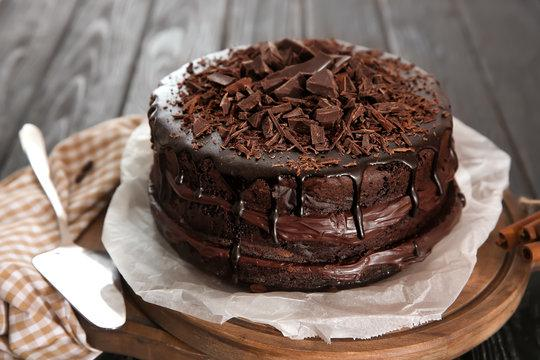

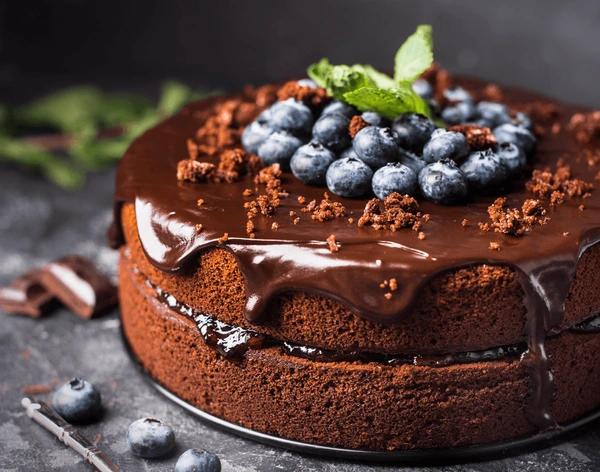

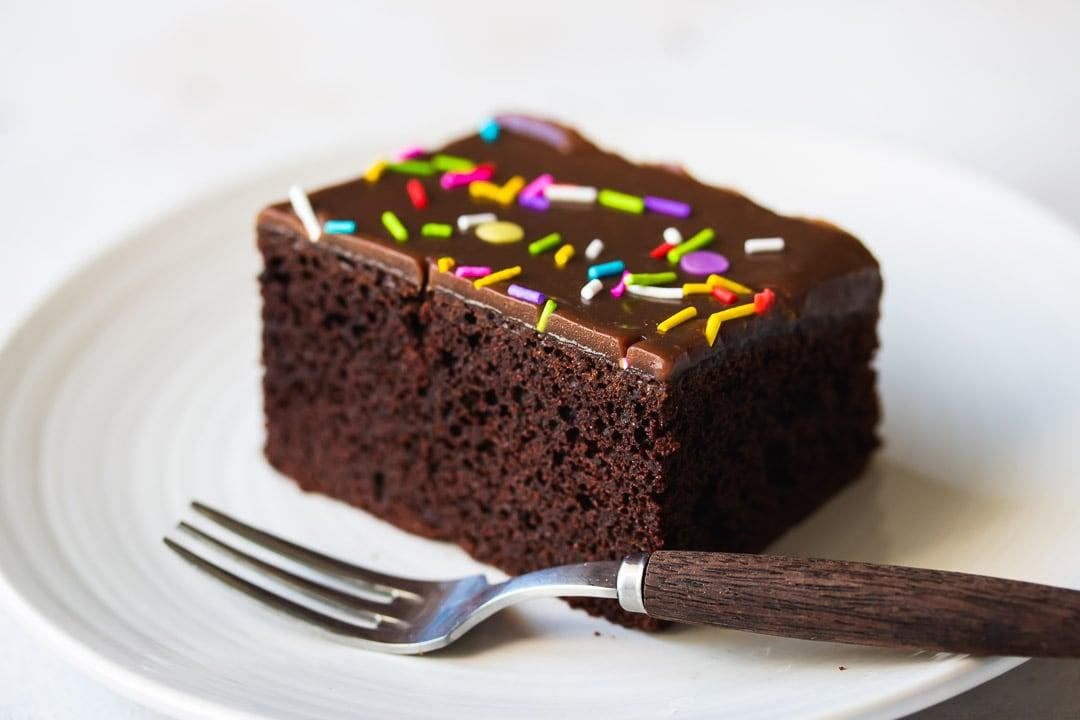

Images for row 1:


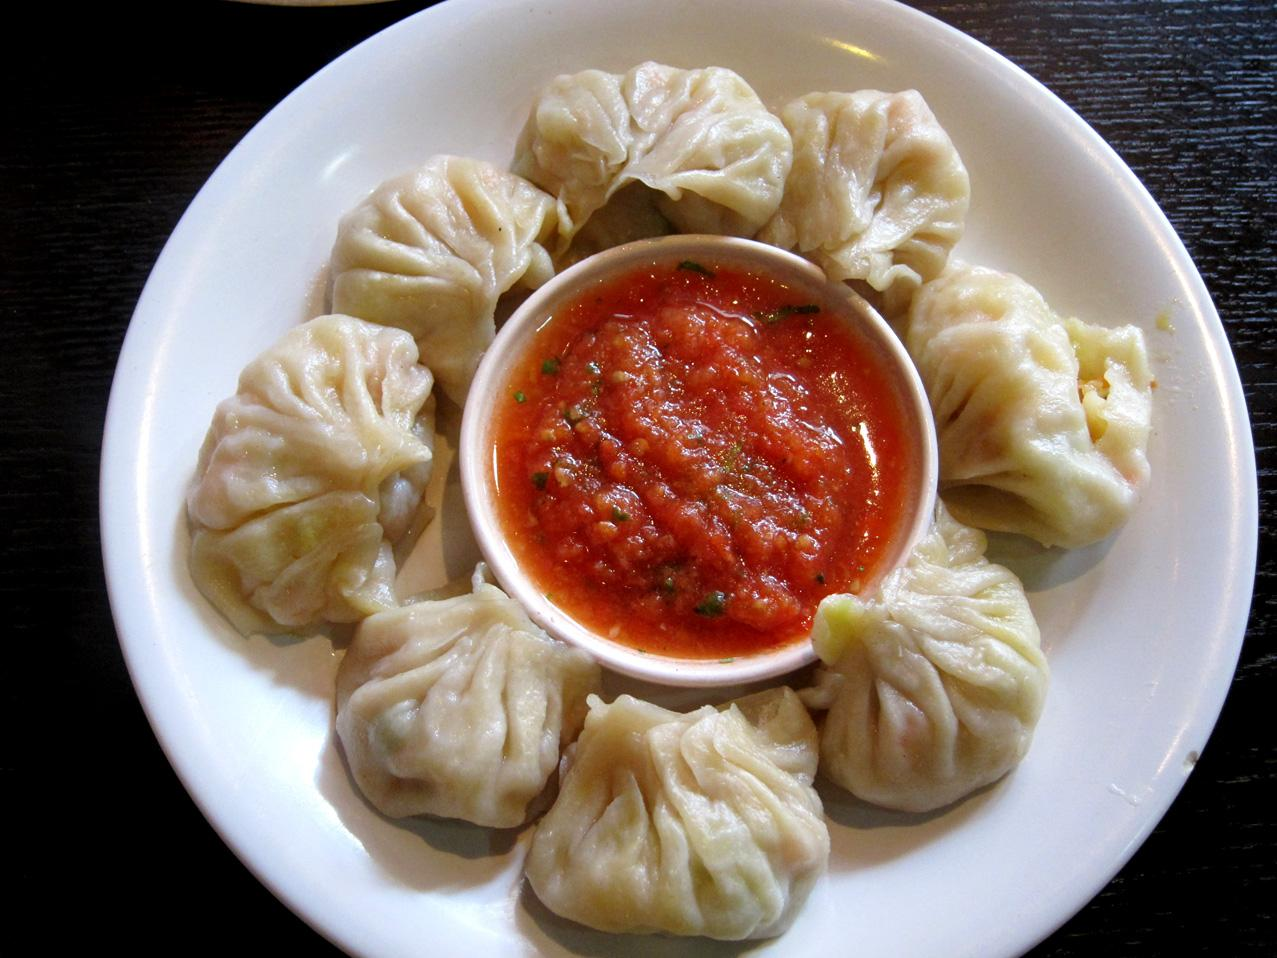

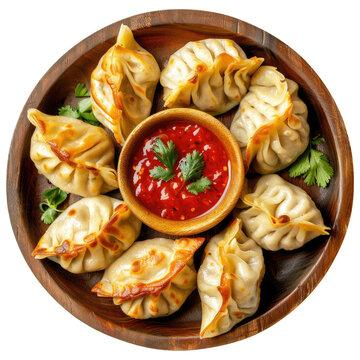

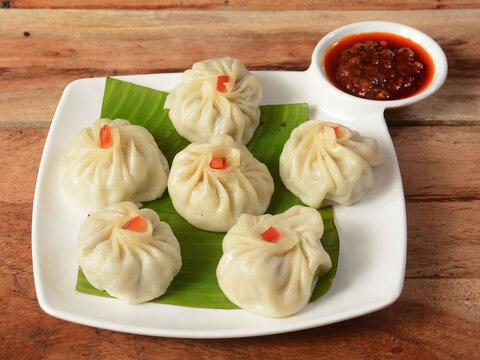

Images for row 2:


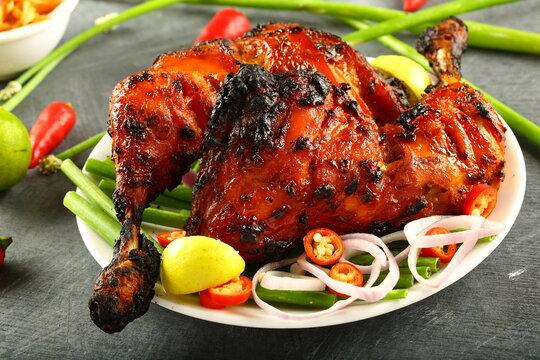

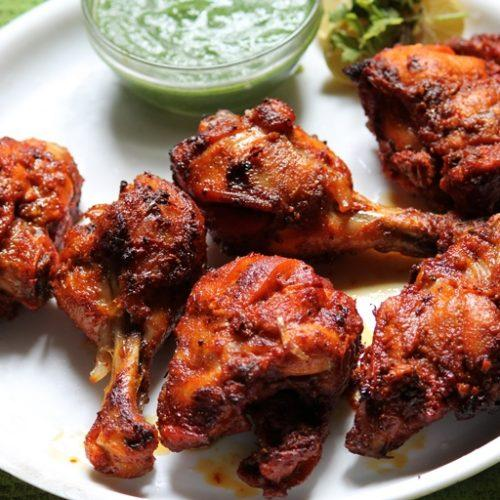

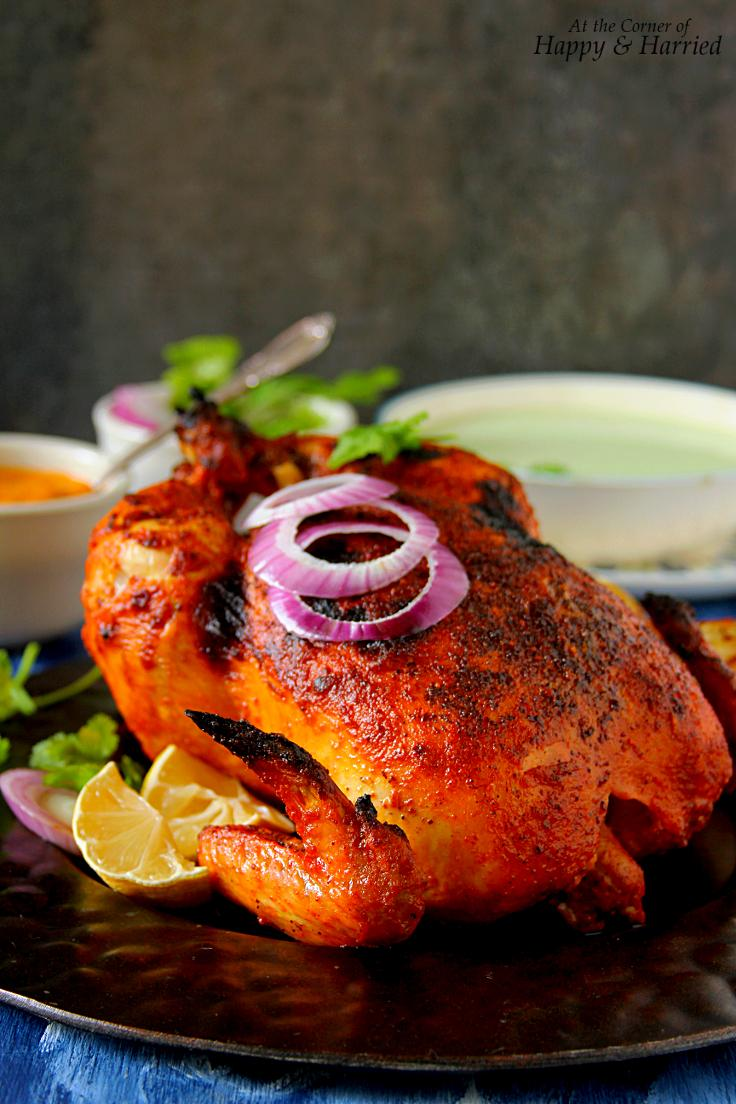

Images for row 3:


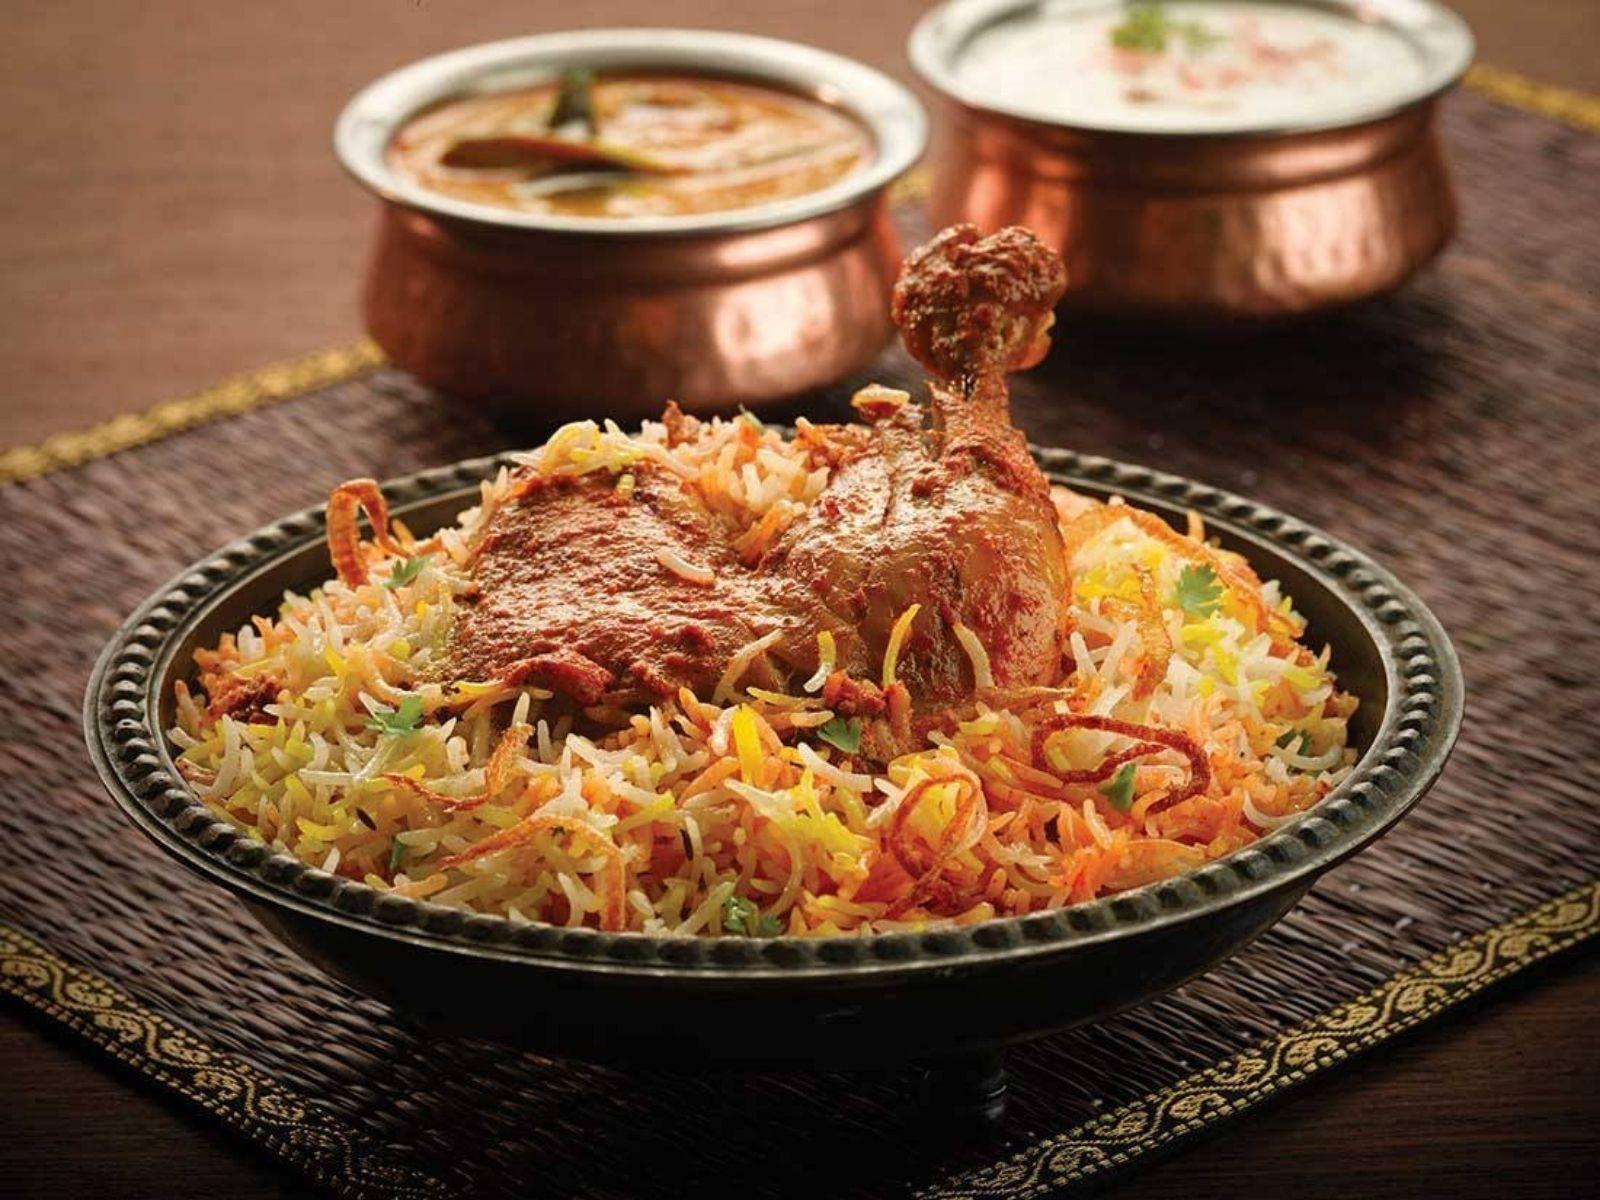

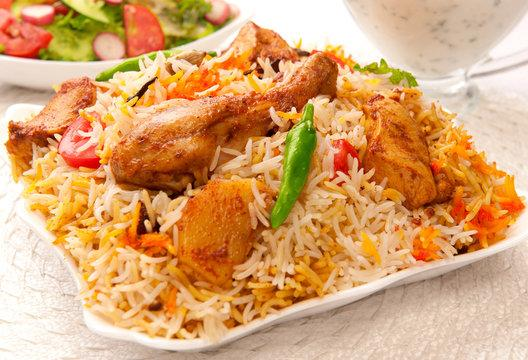

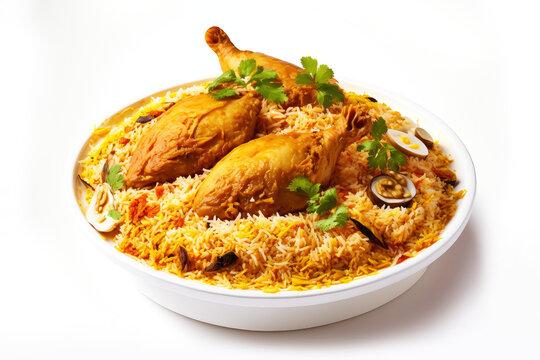

Images for row 4:


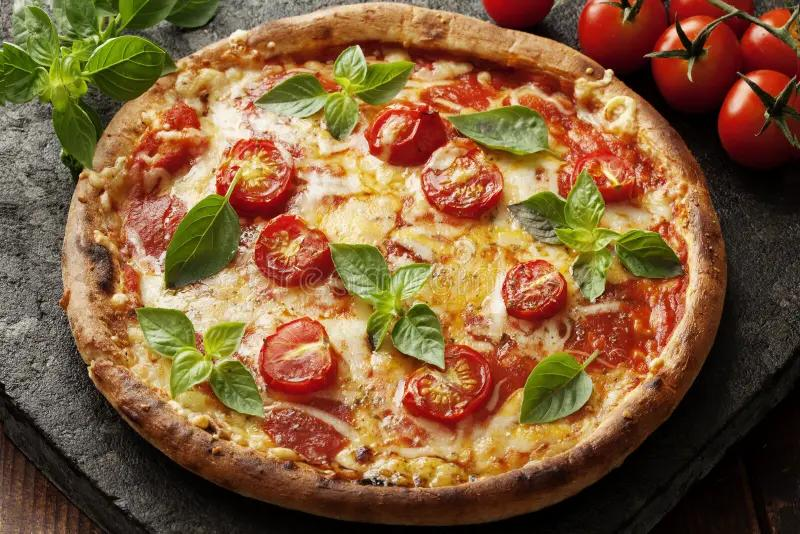

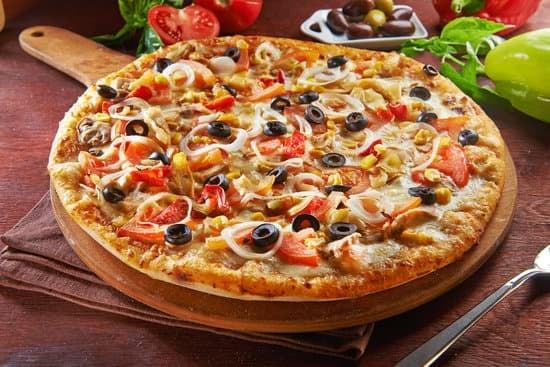

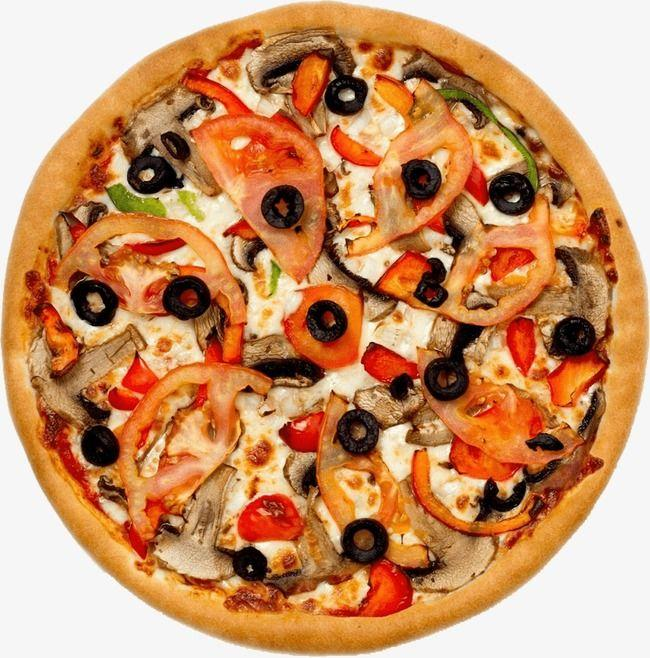

Images for row 5:


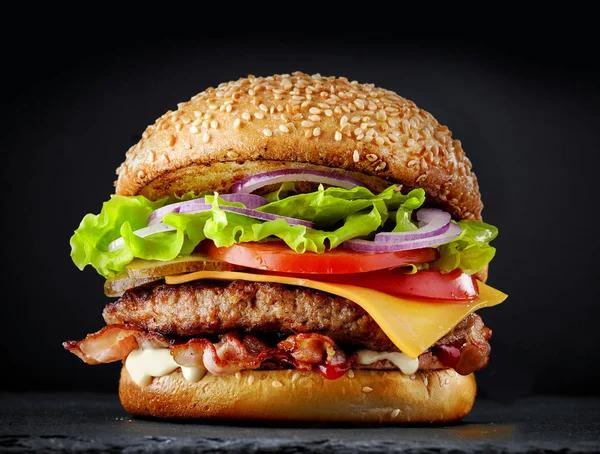

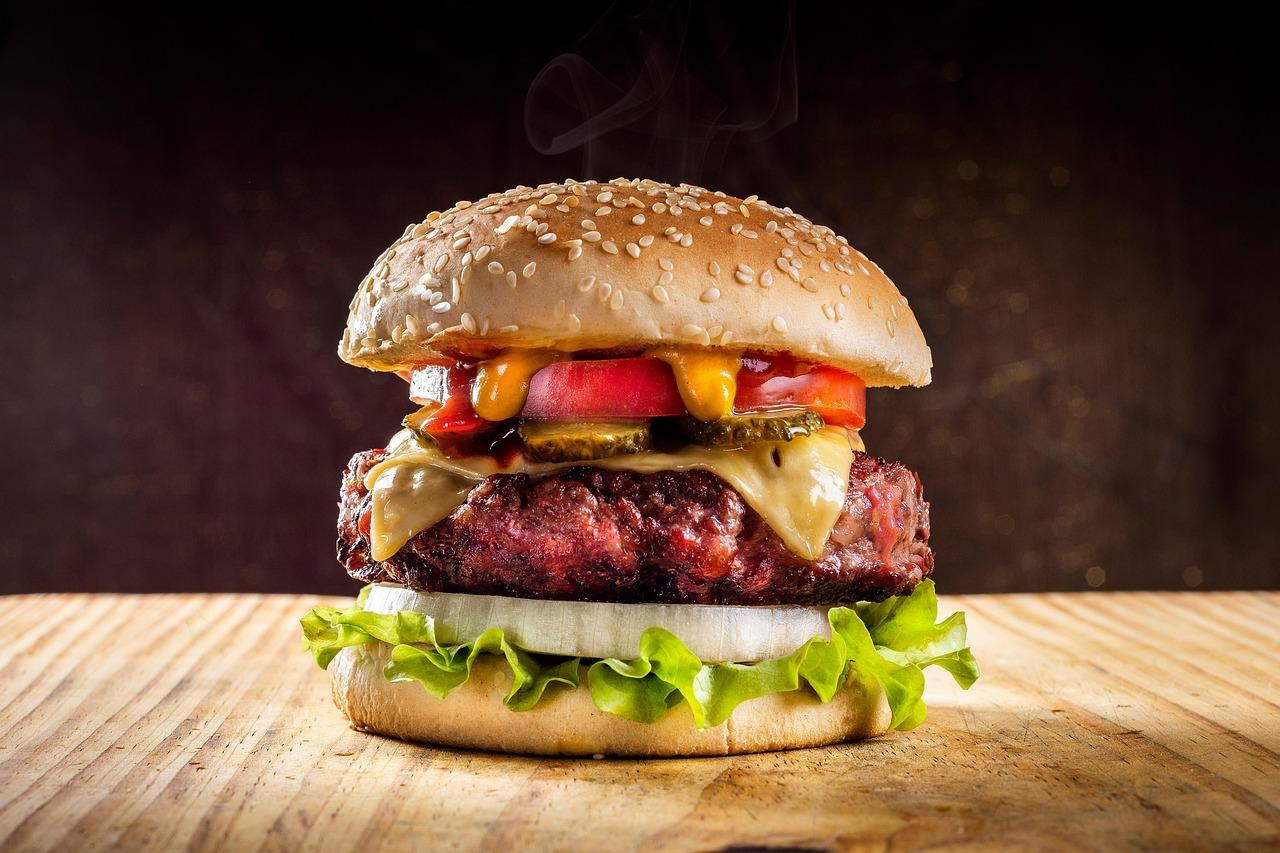

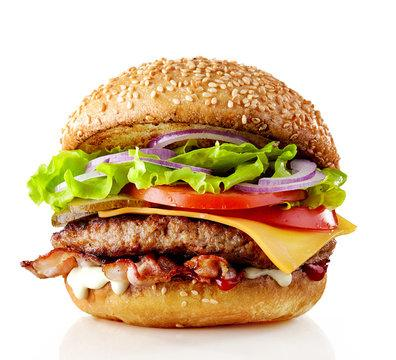

Images for row 6:


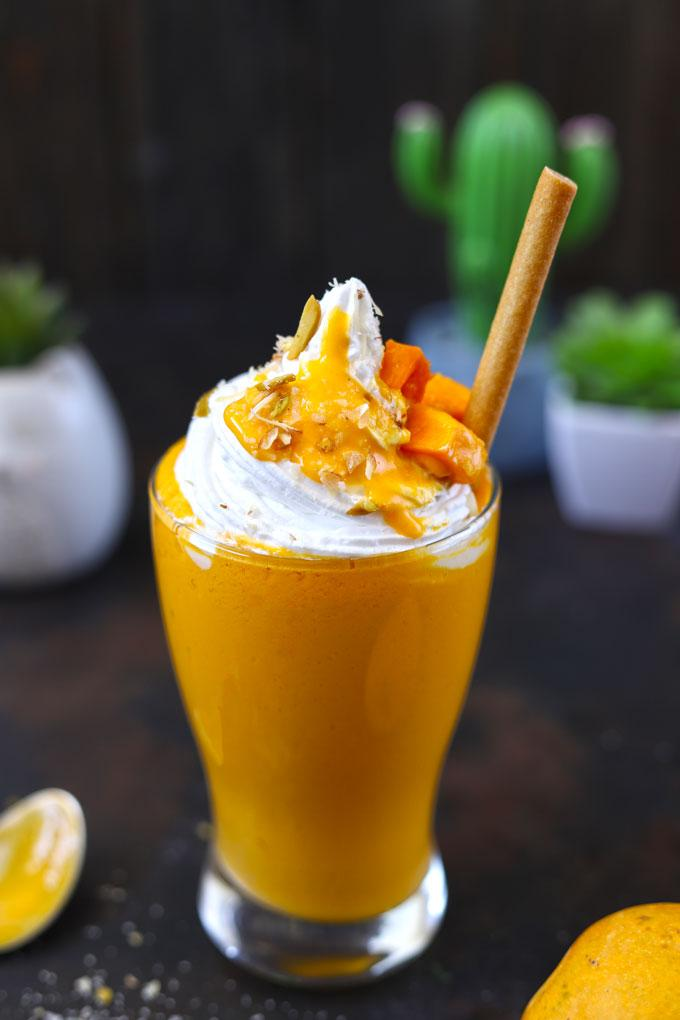

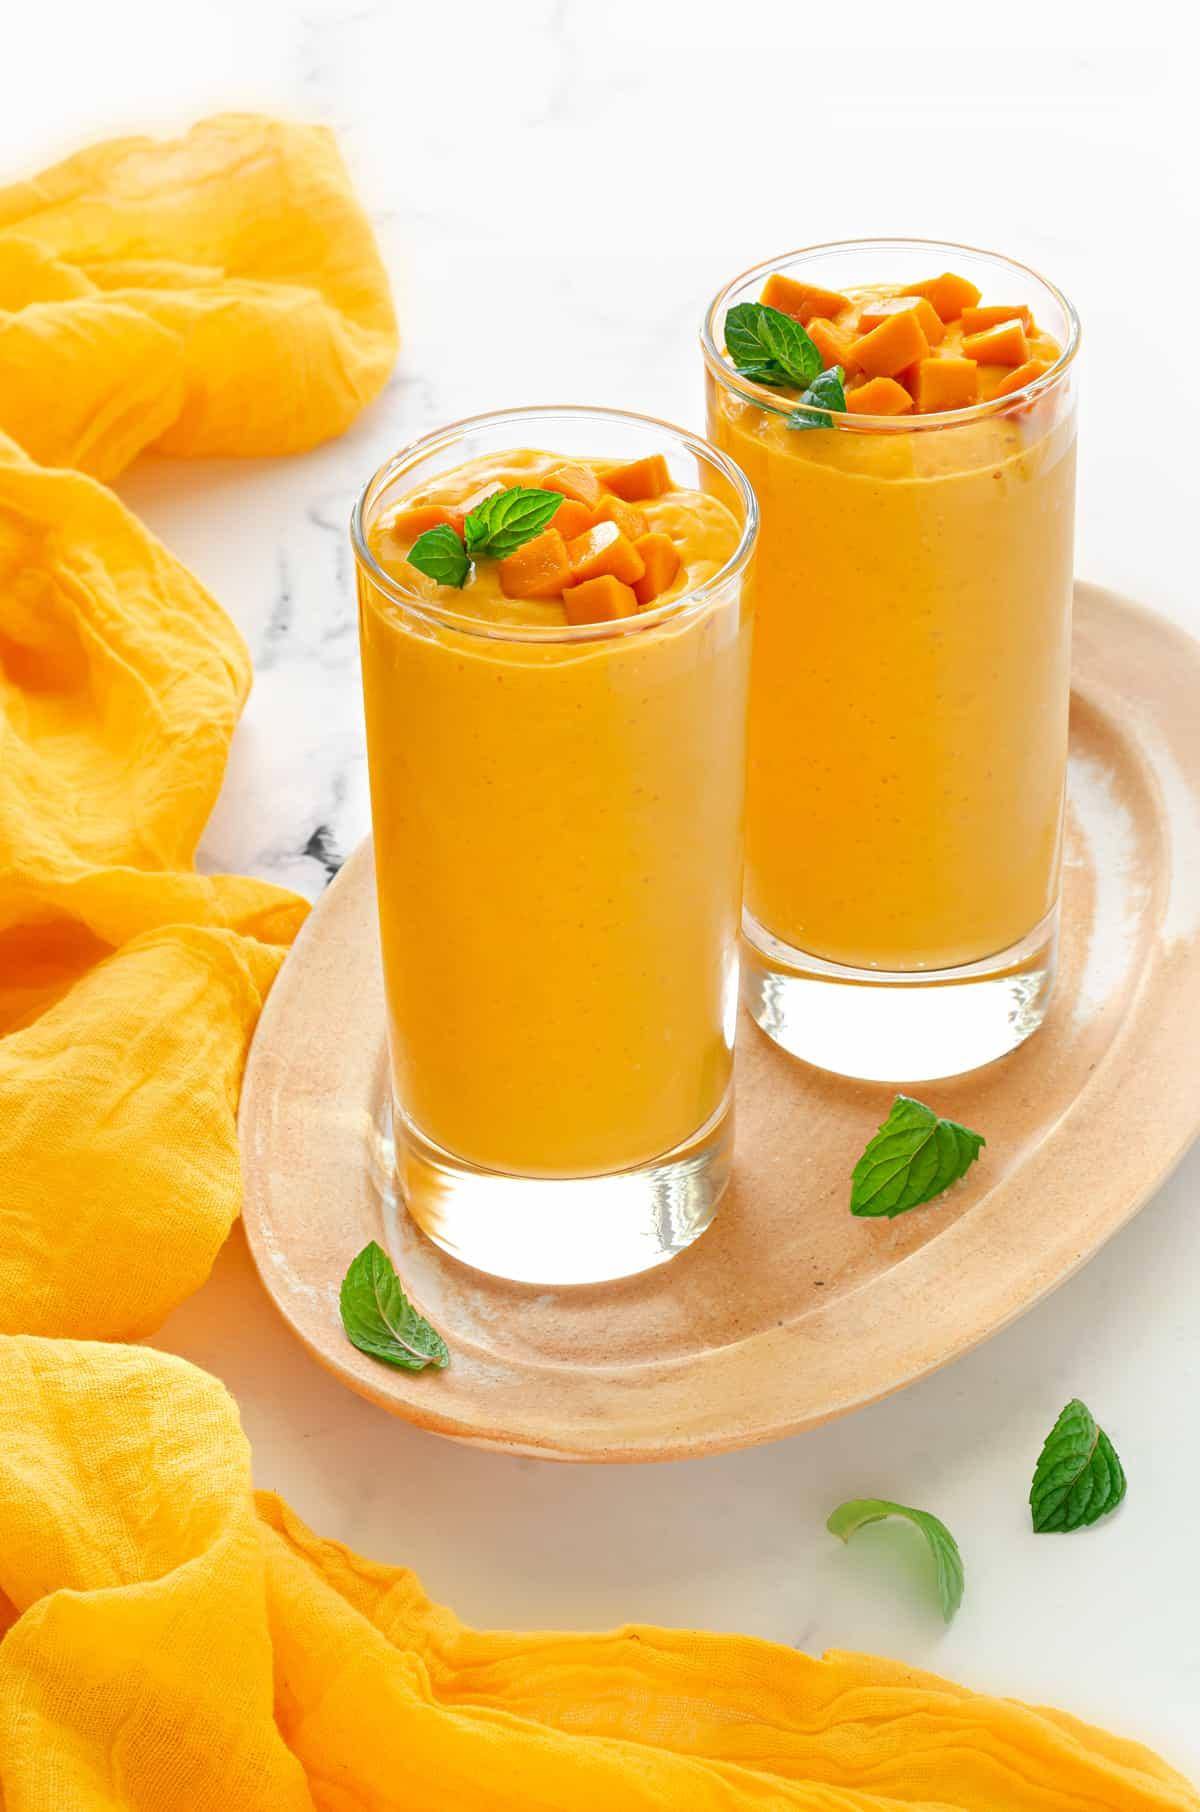

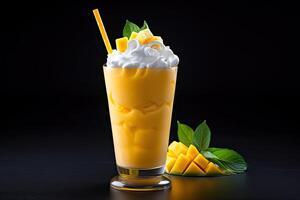

Images for row 7:


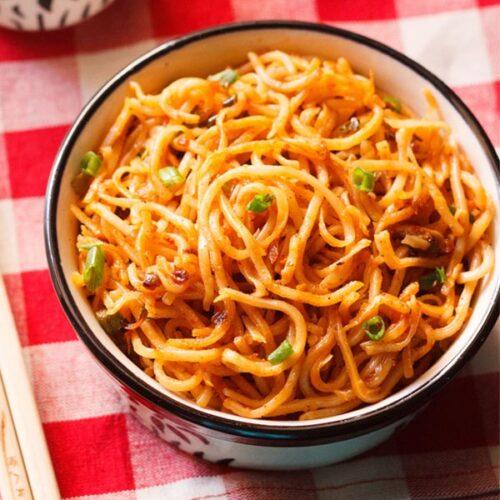

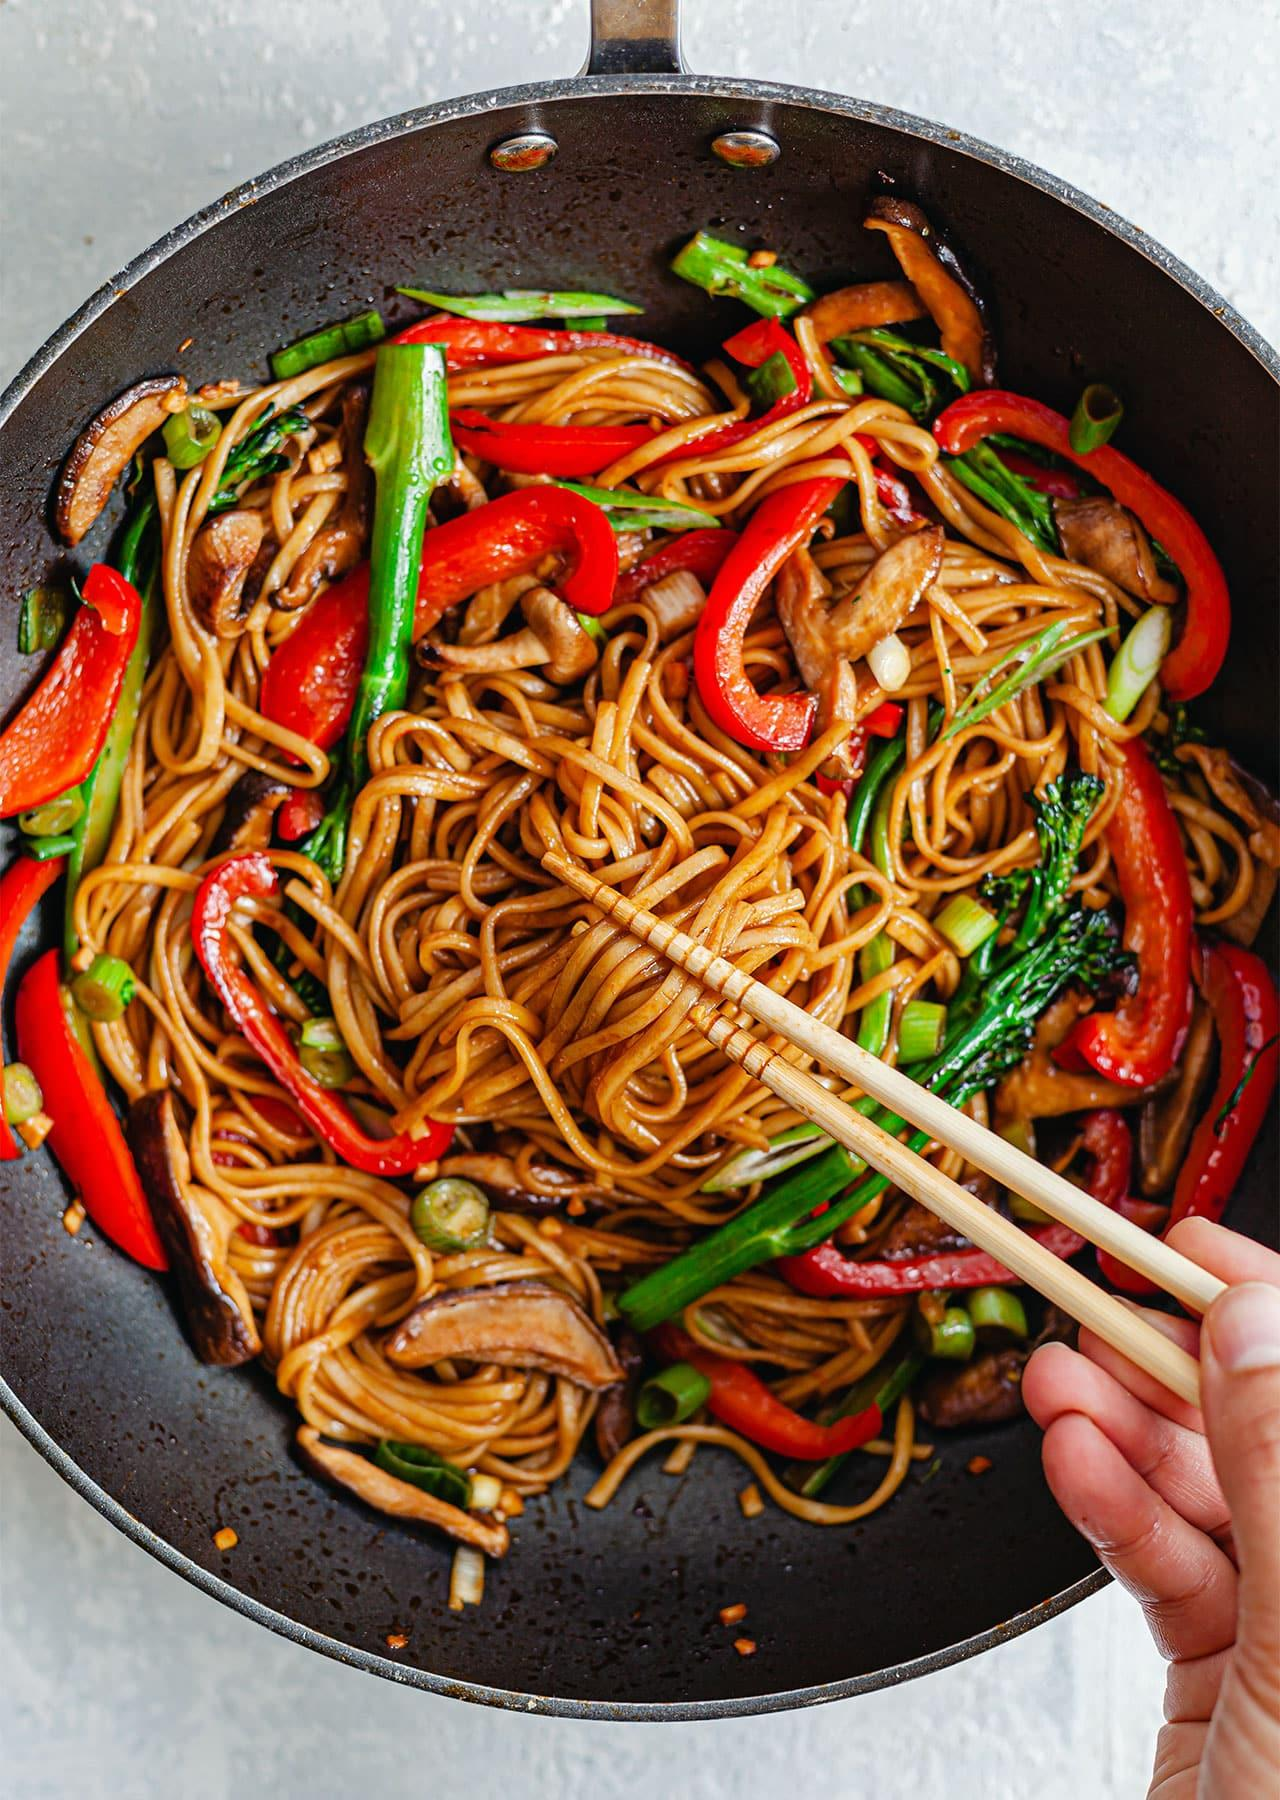

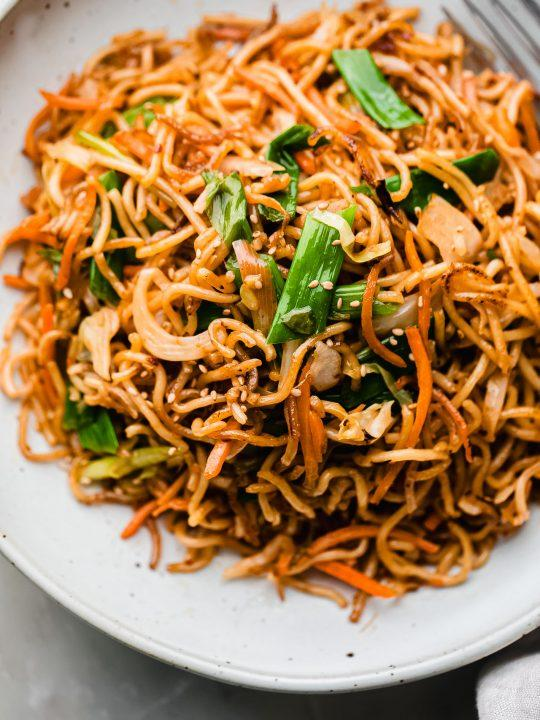

Images for row 8:


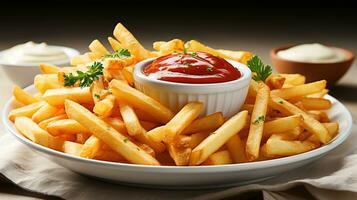

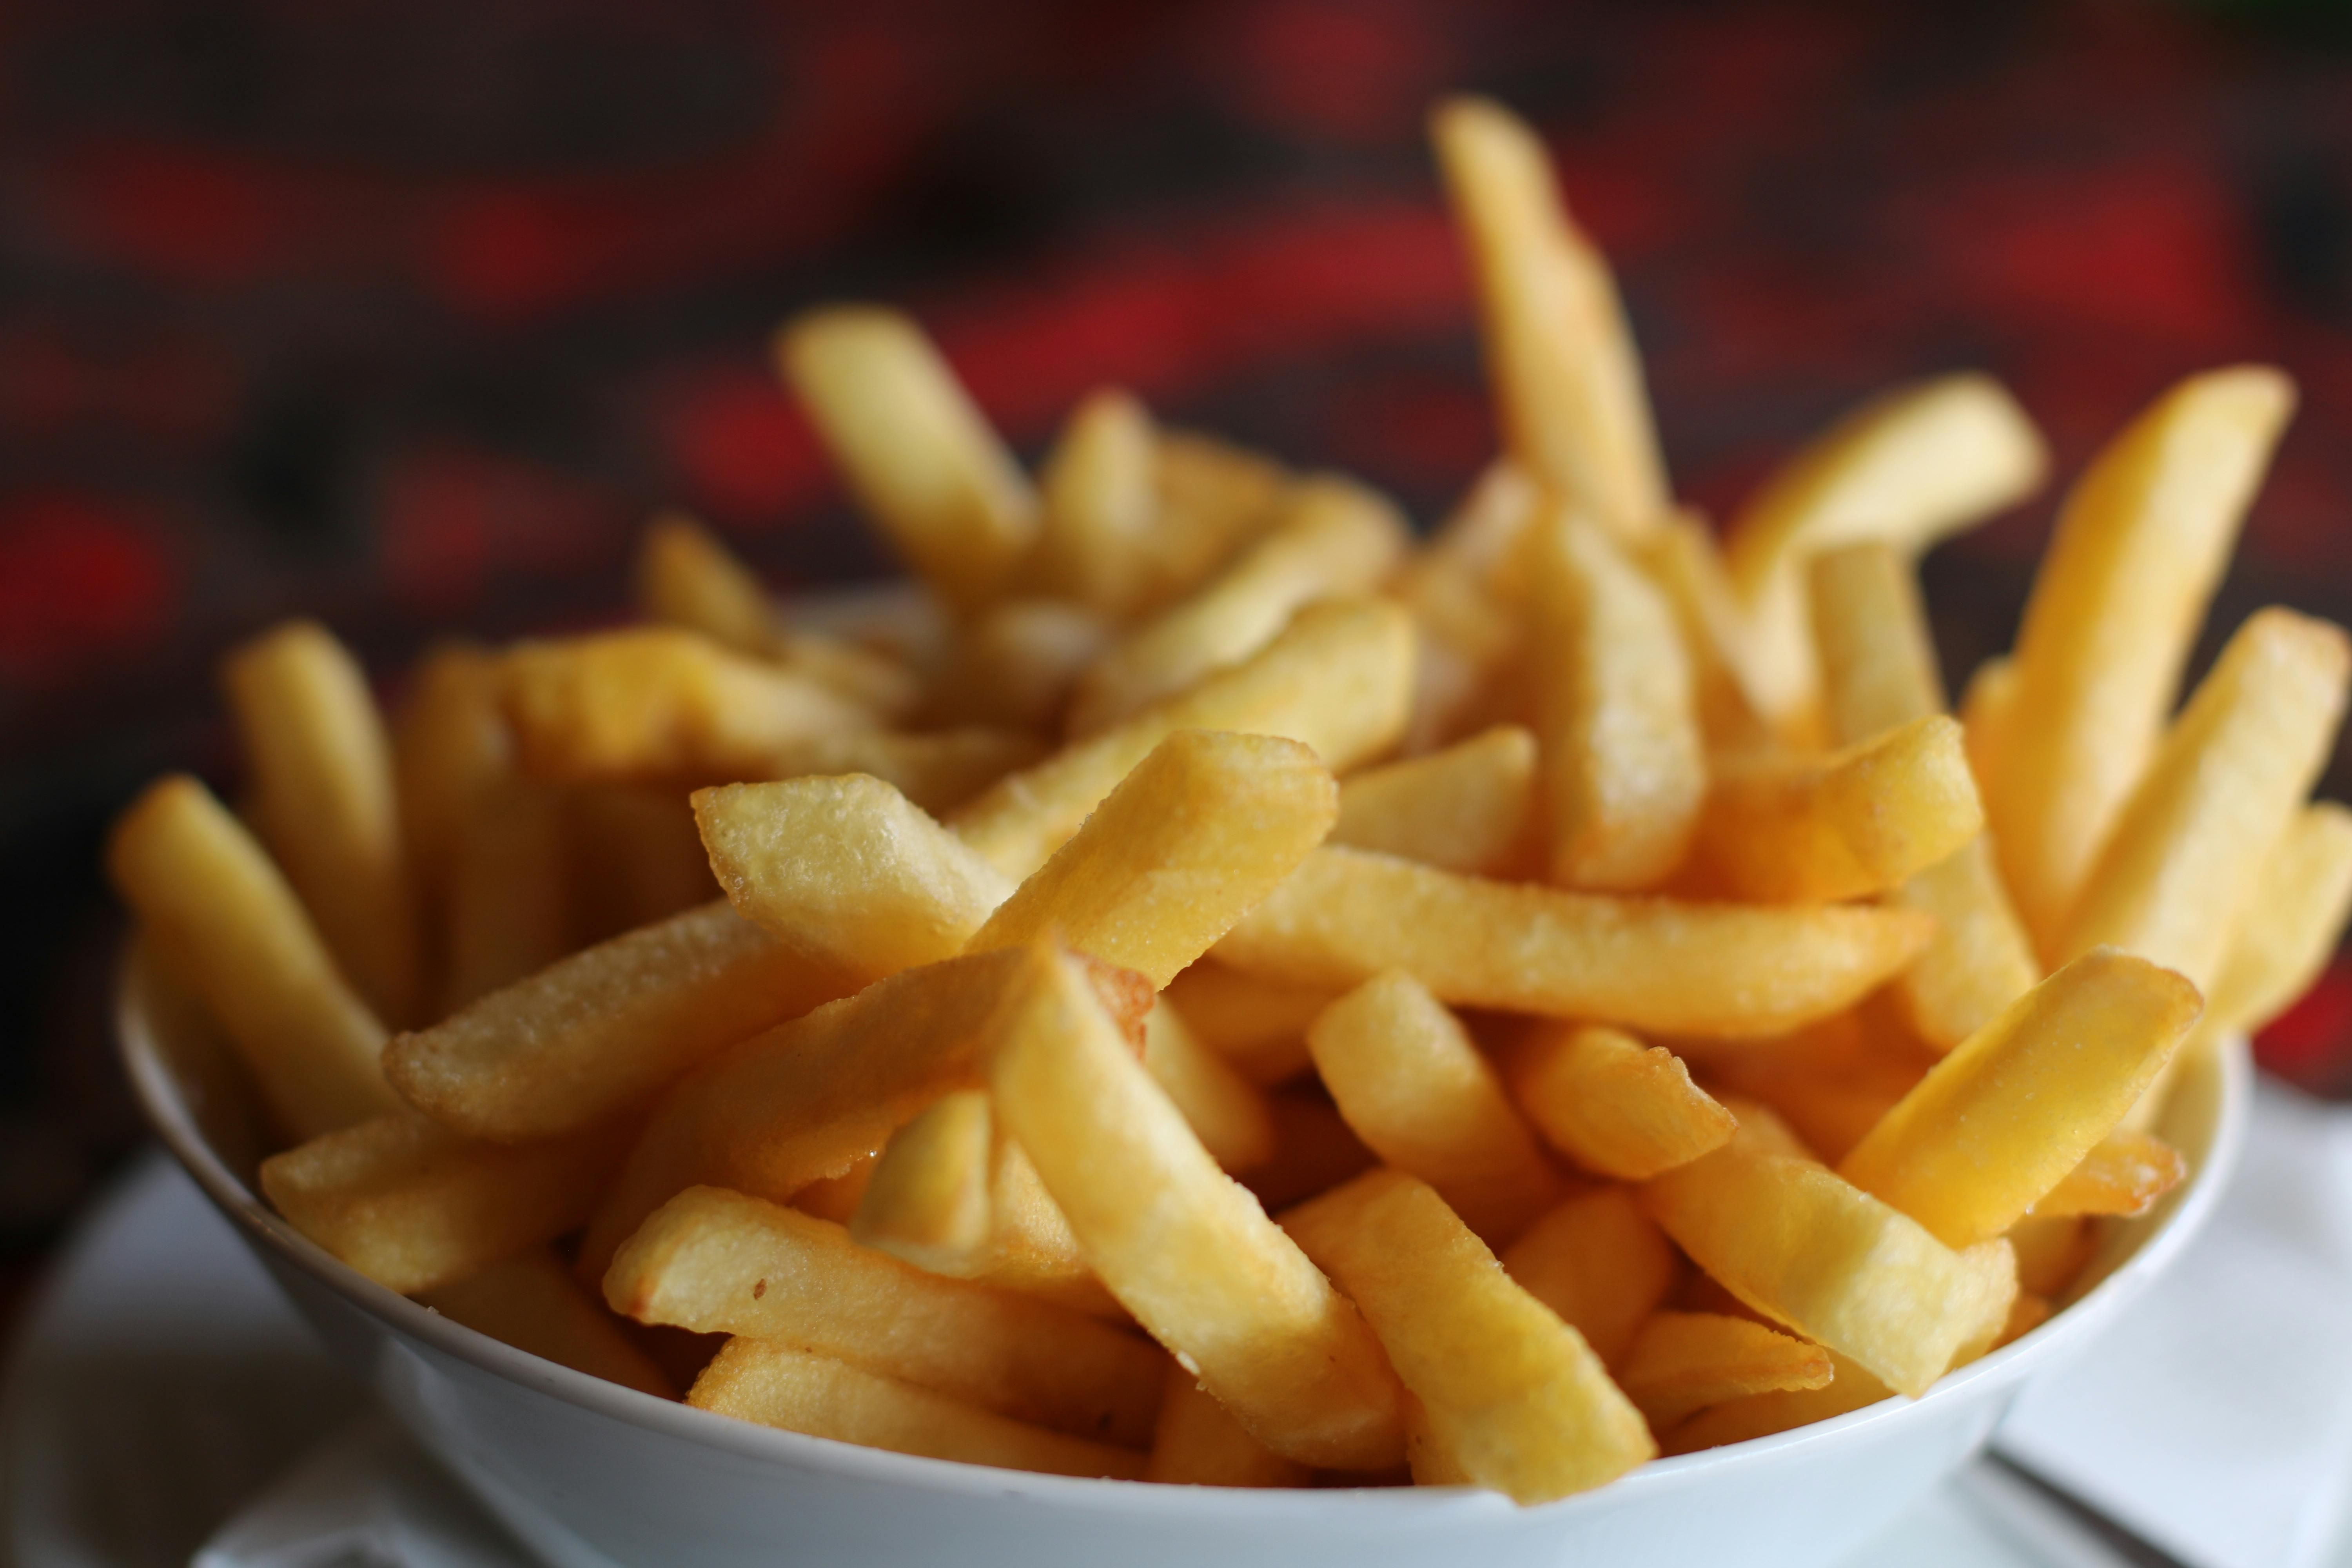

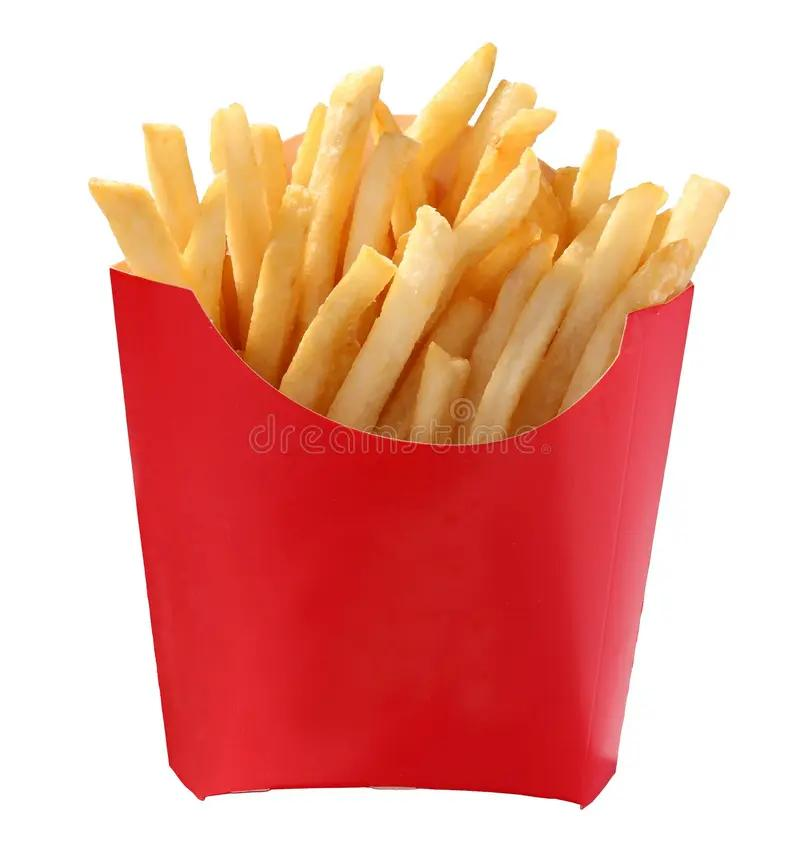

Images for row 9:


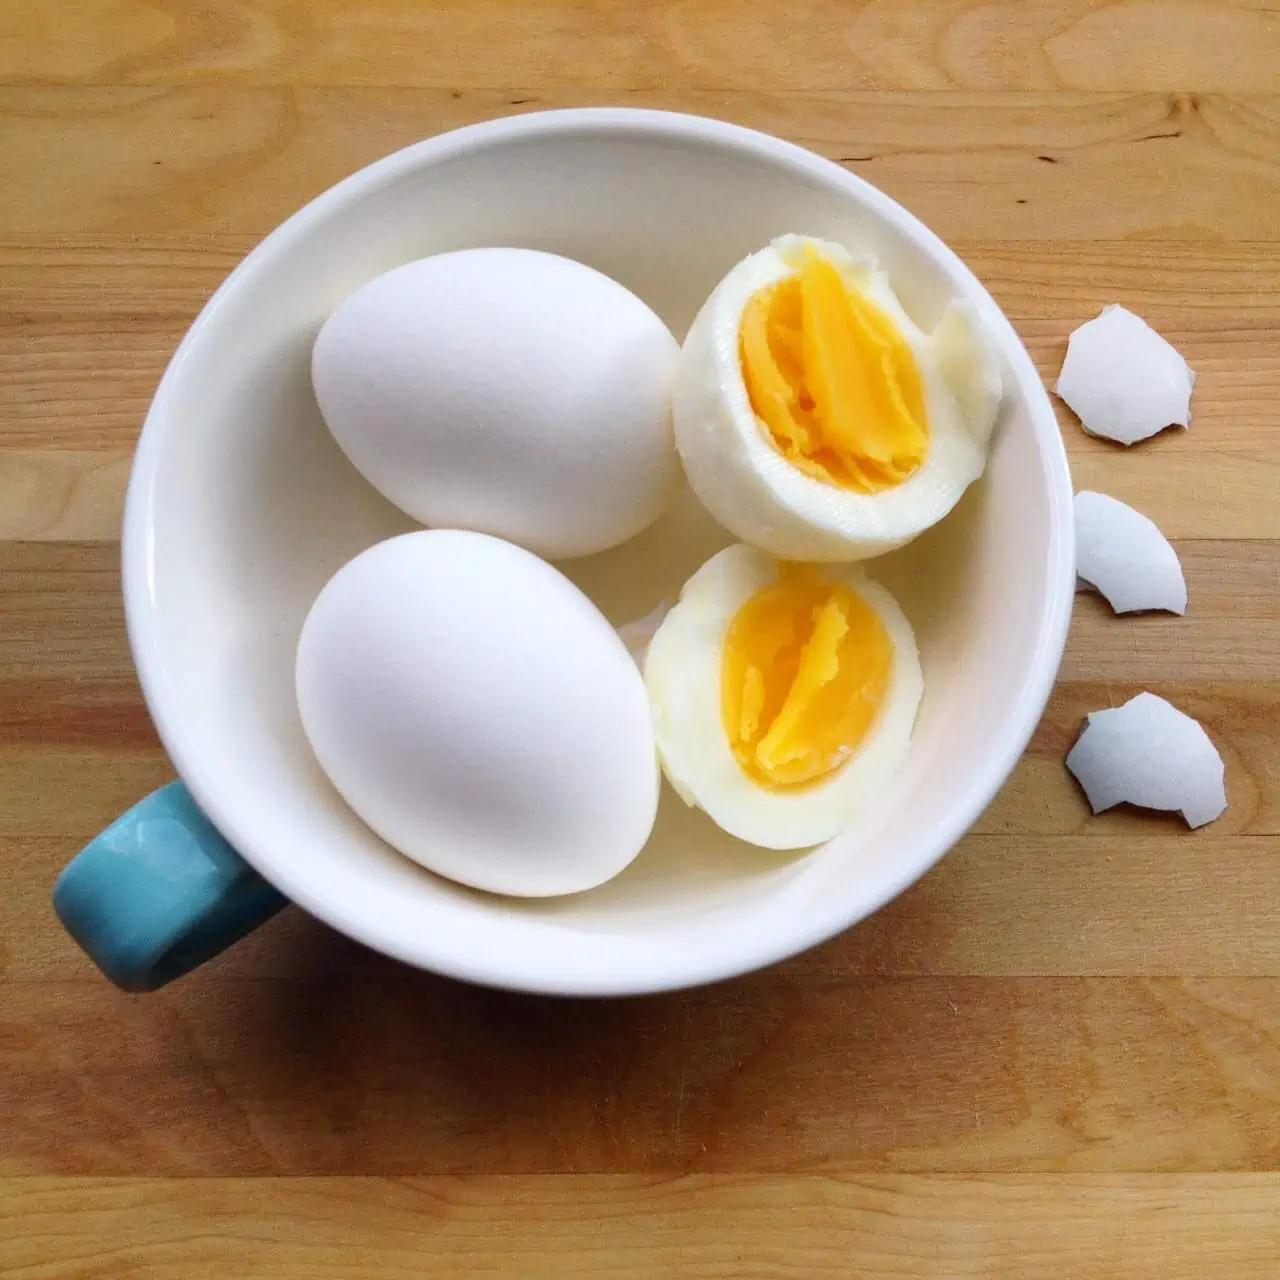

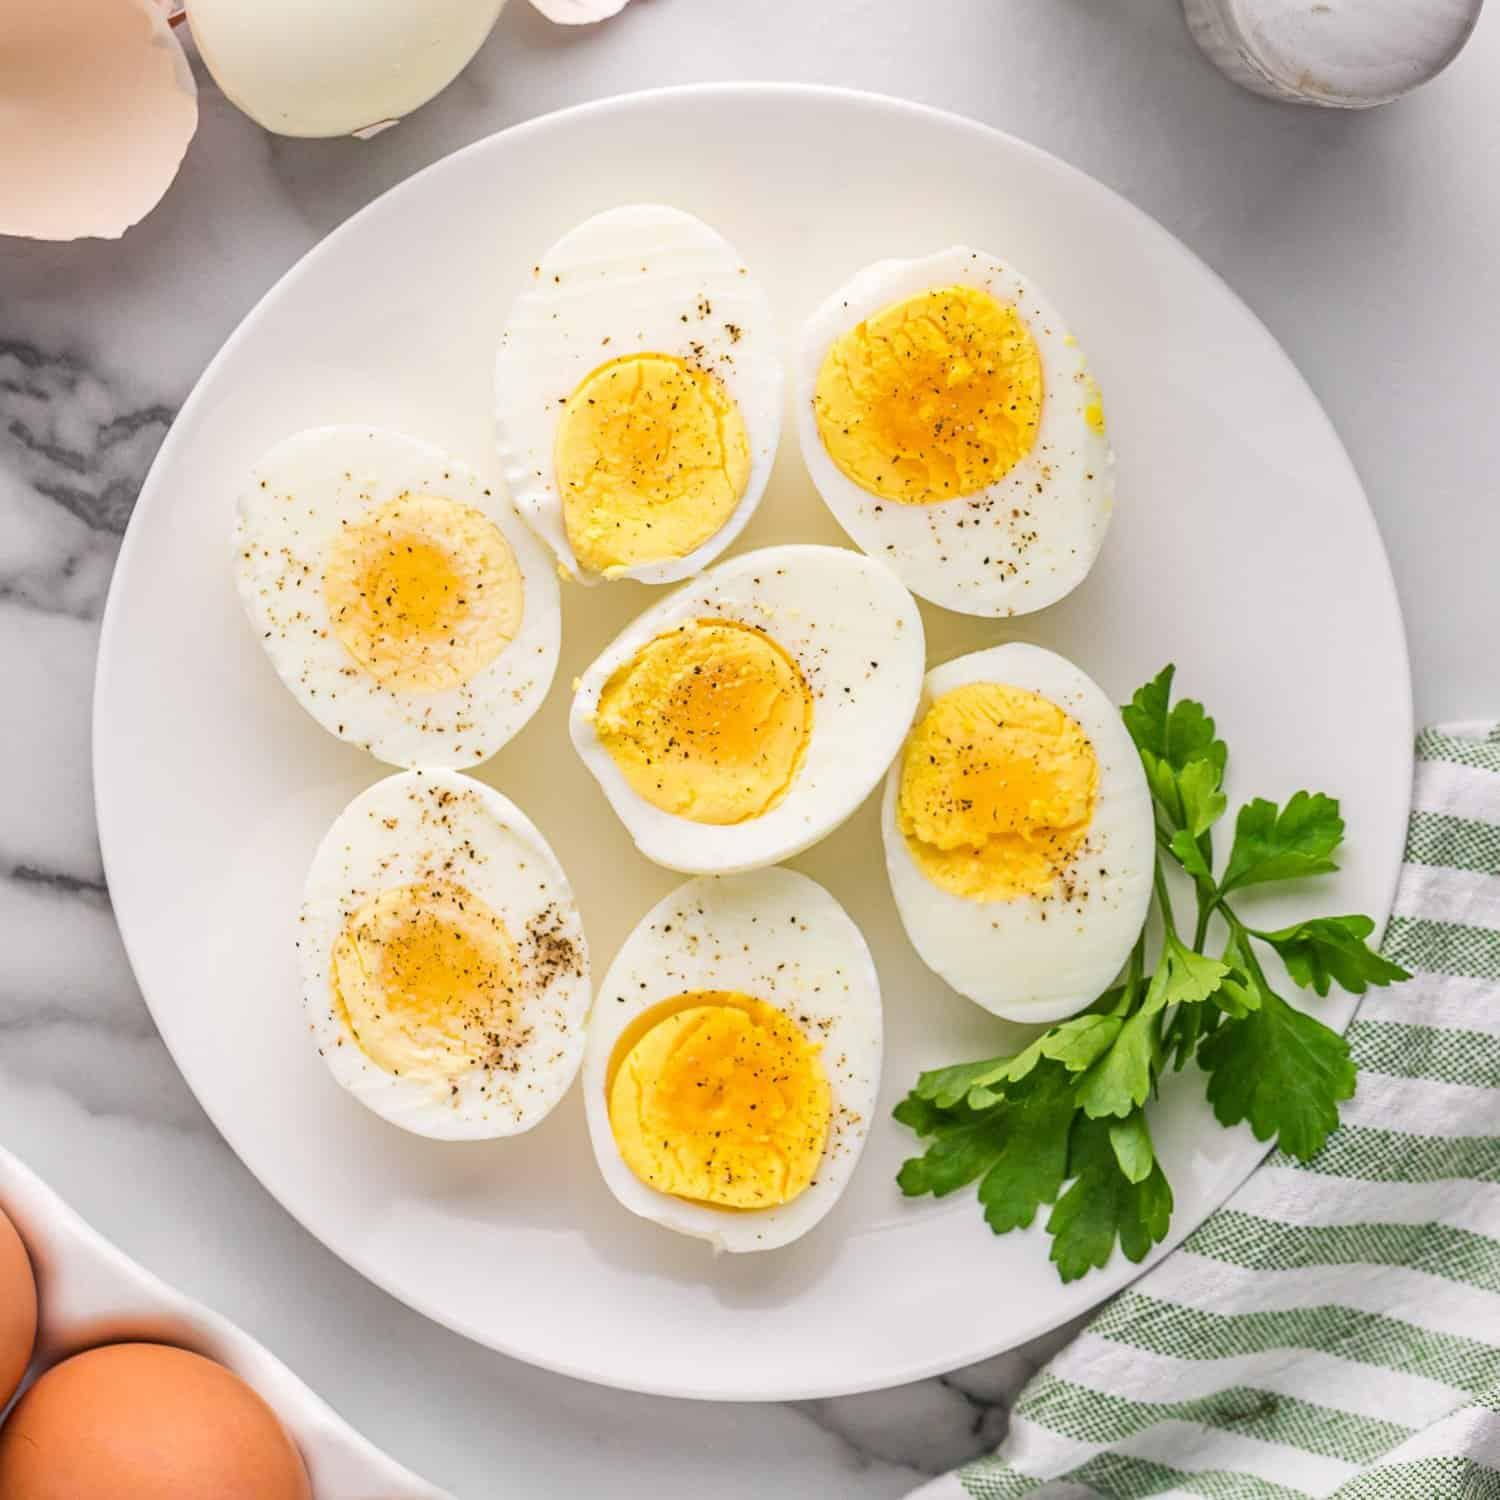

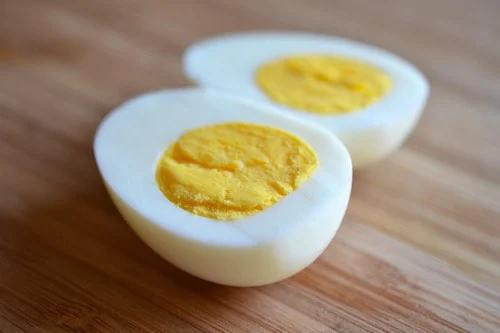

Images for row 10:


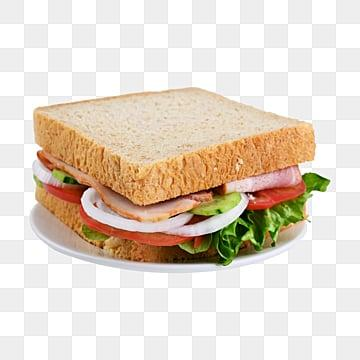

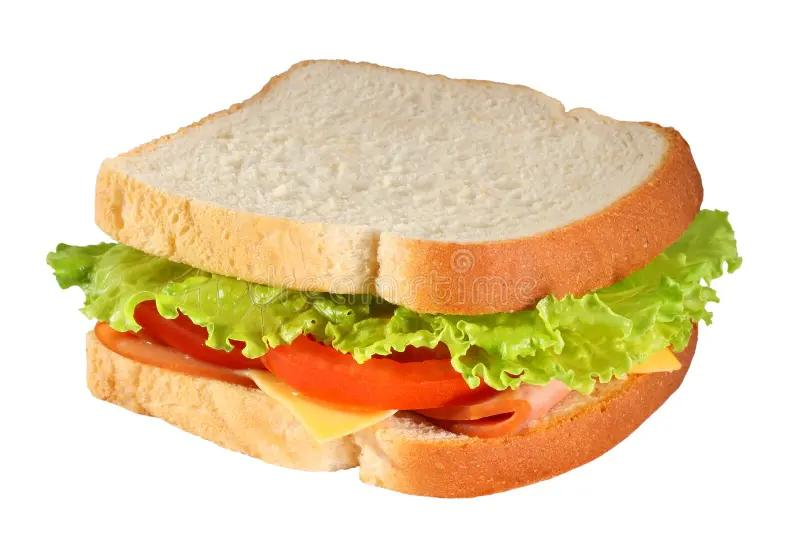

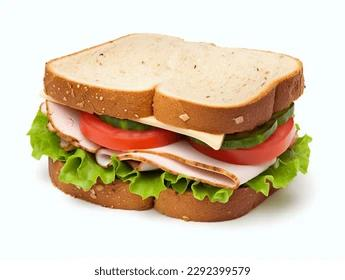

Images for row 11:


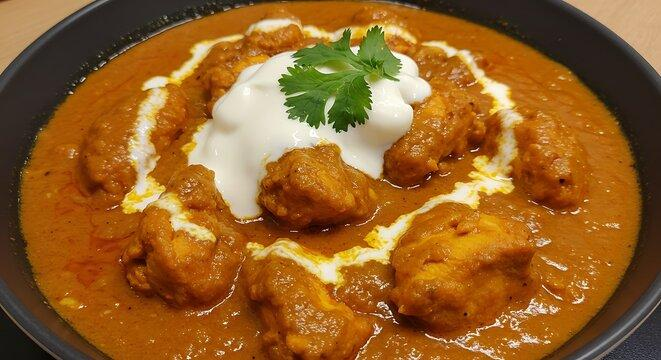

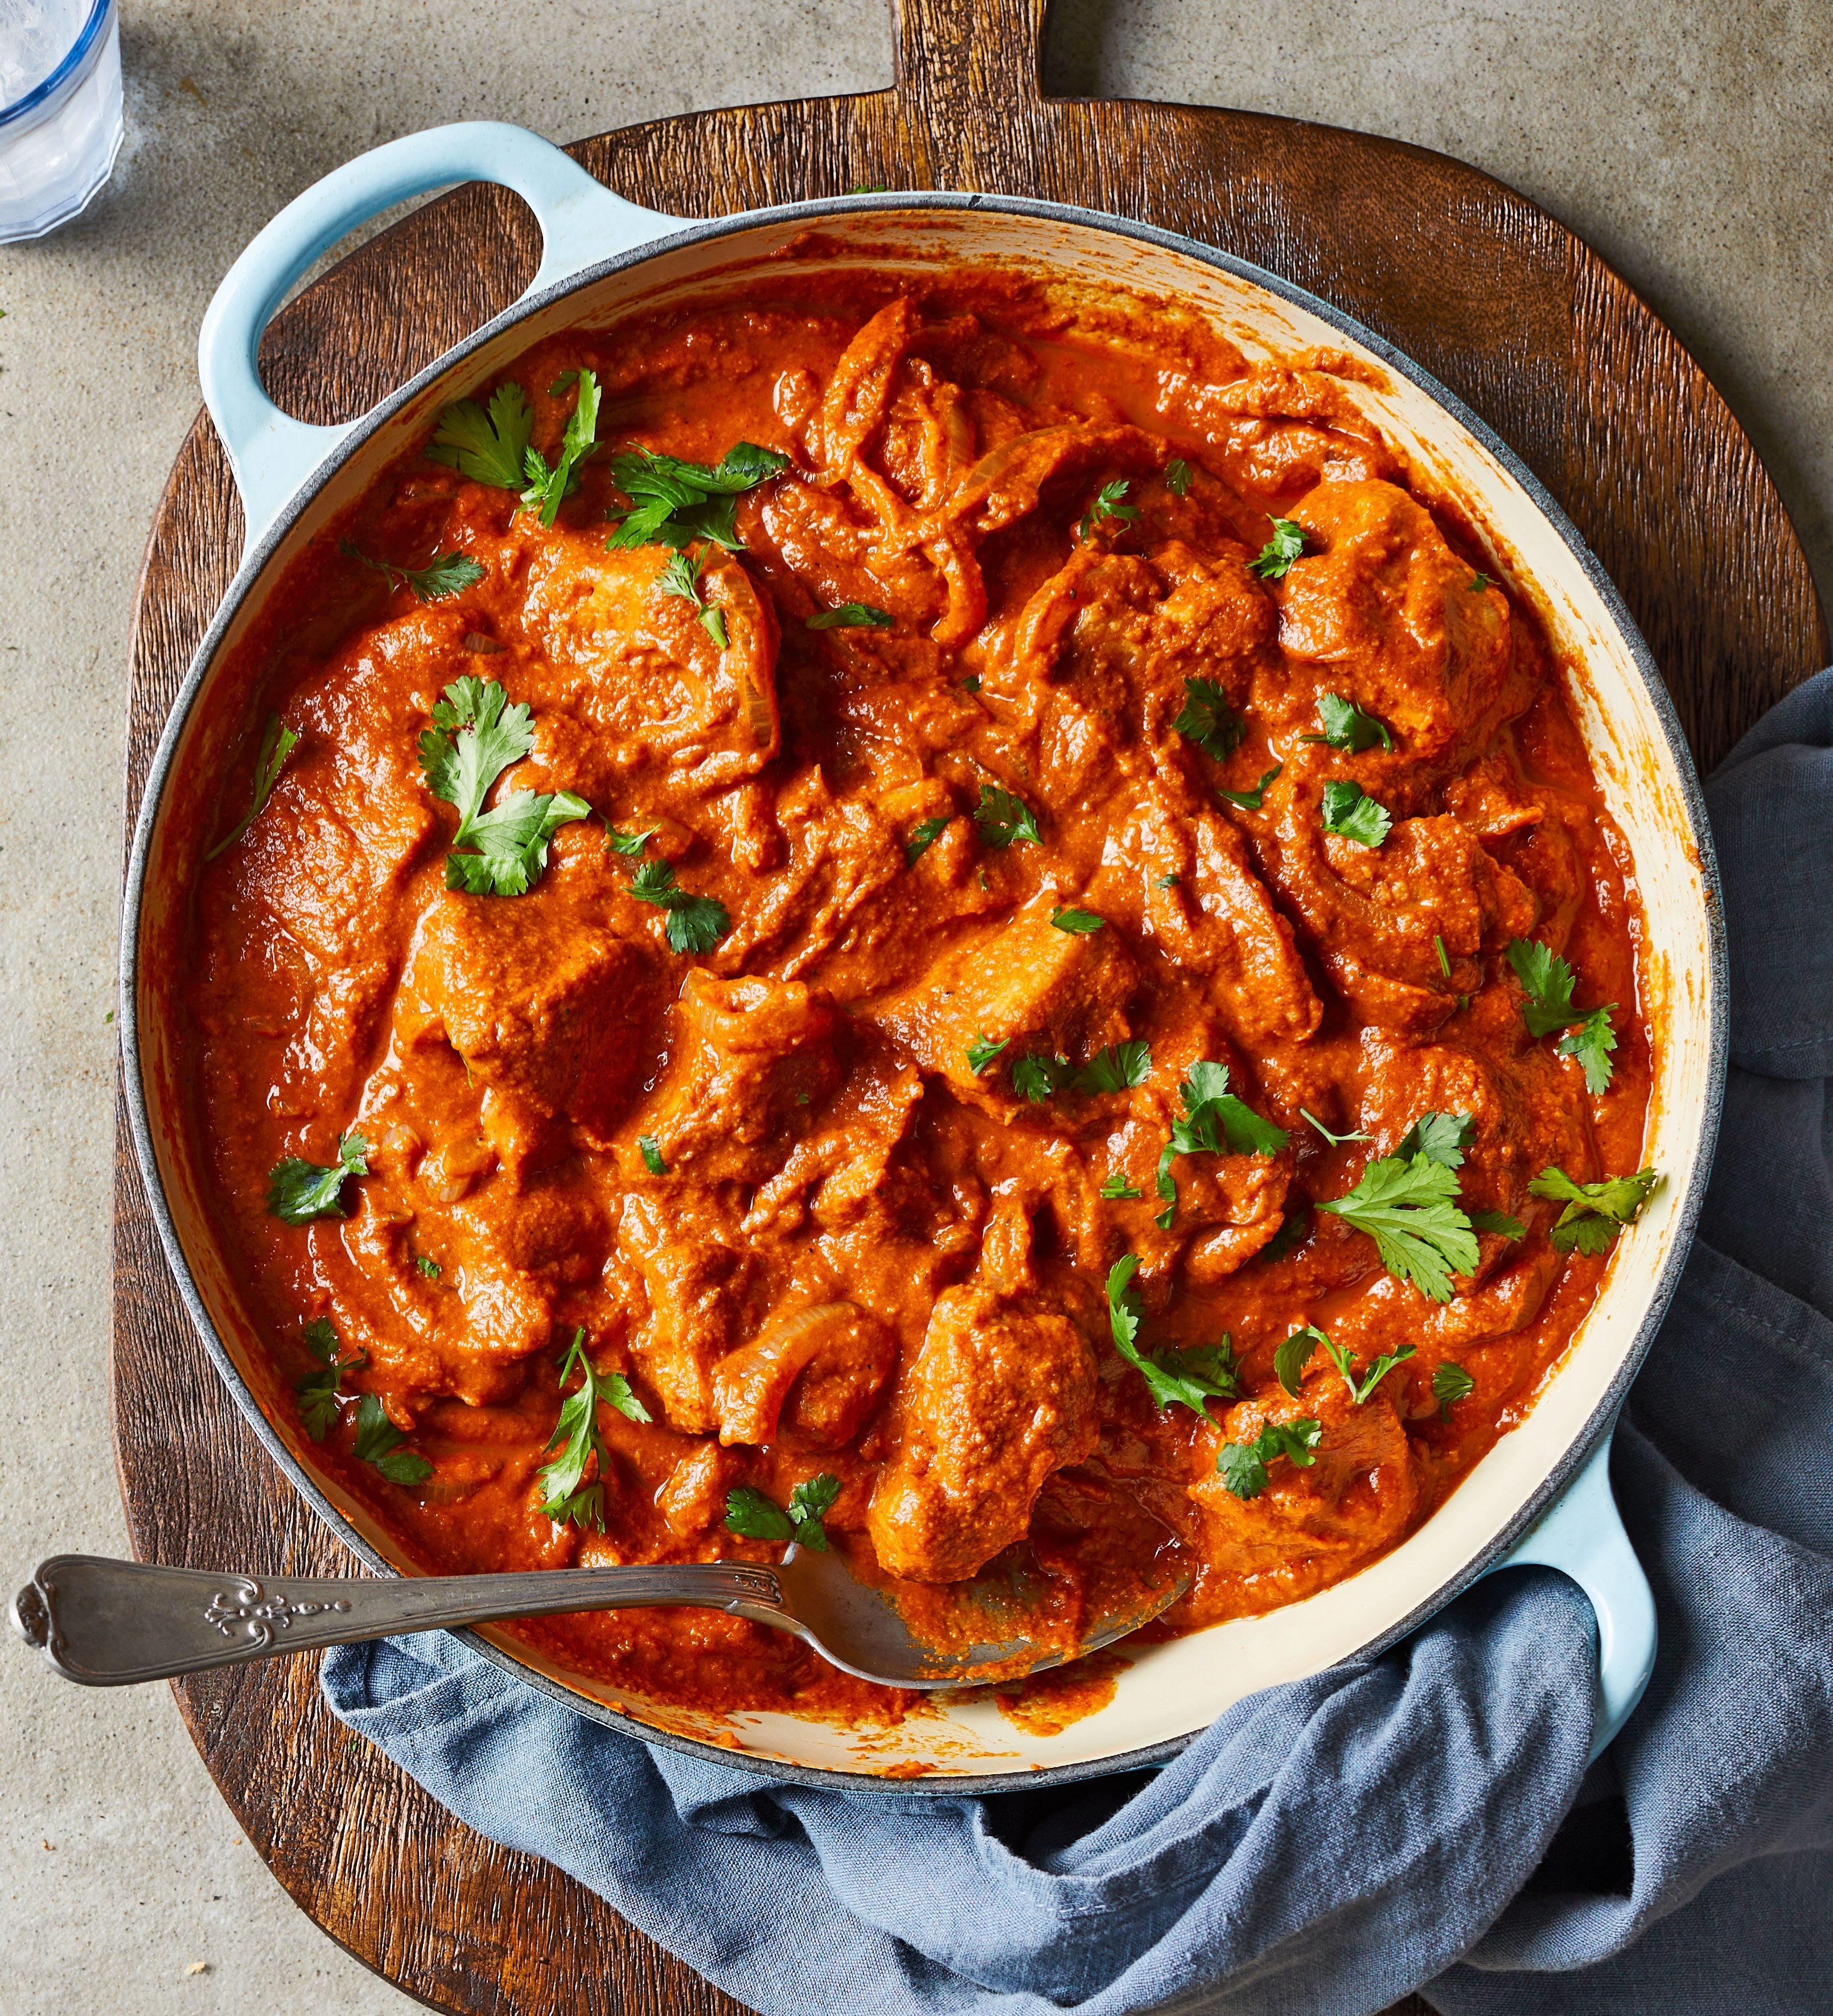

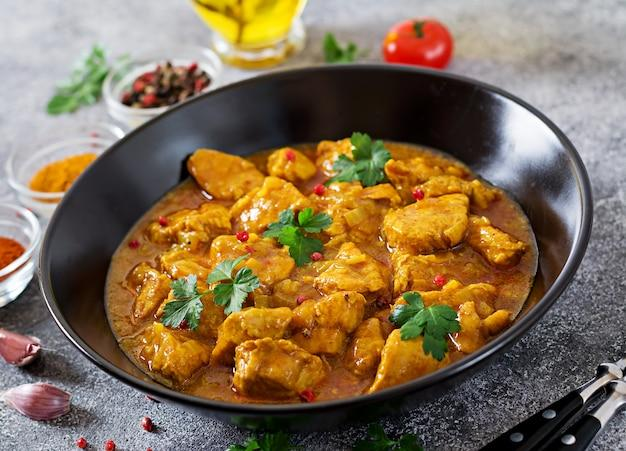

Images for row 12:


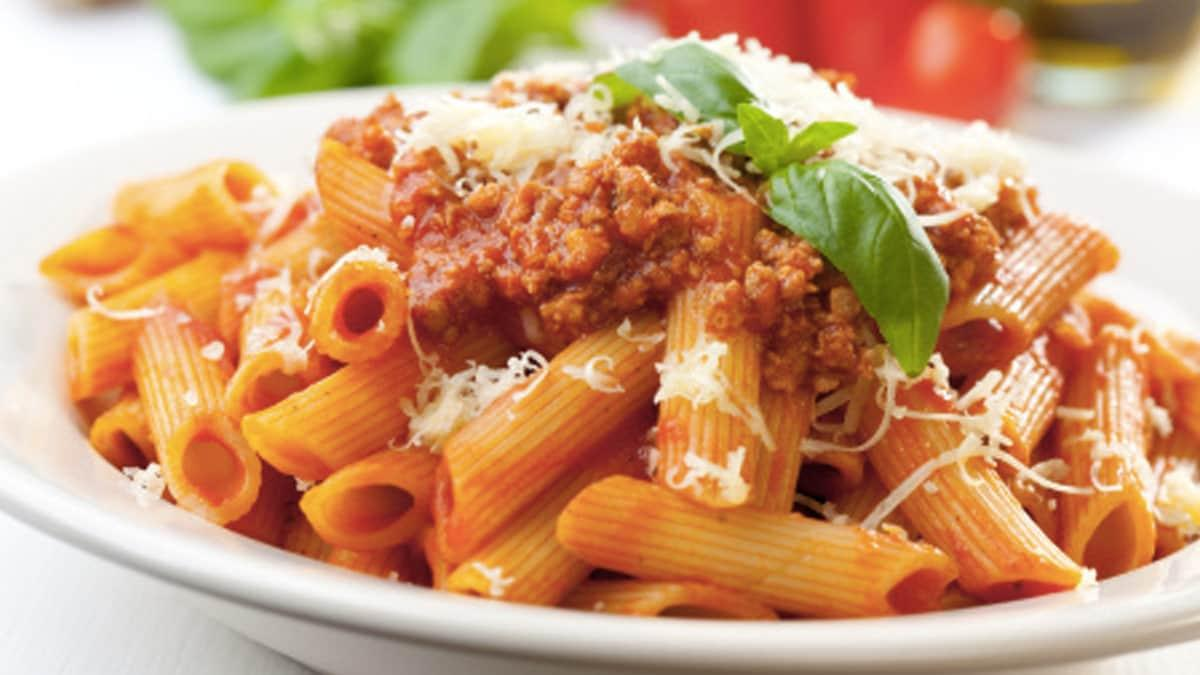

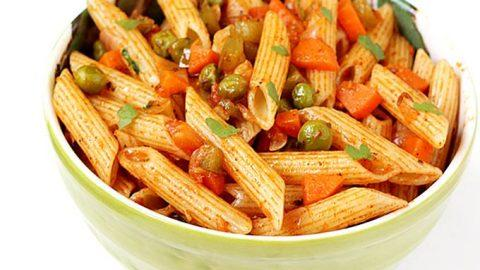

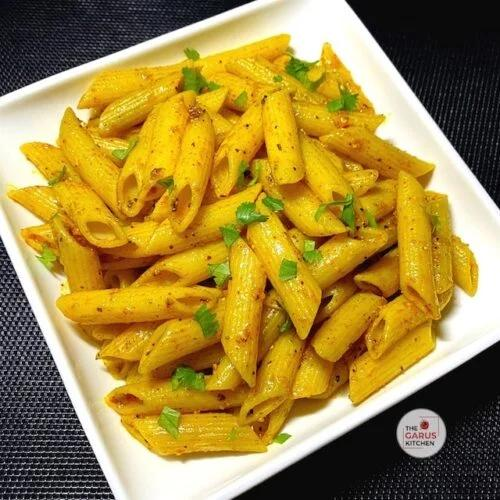

Images for row 13:


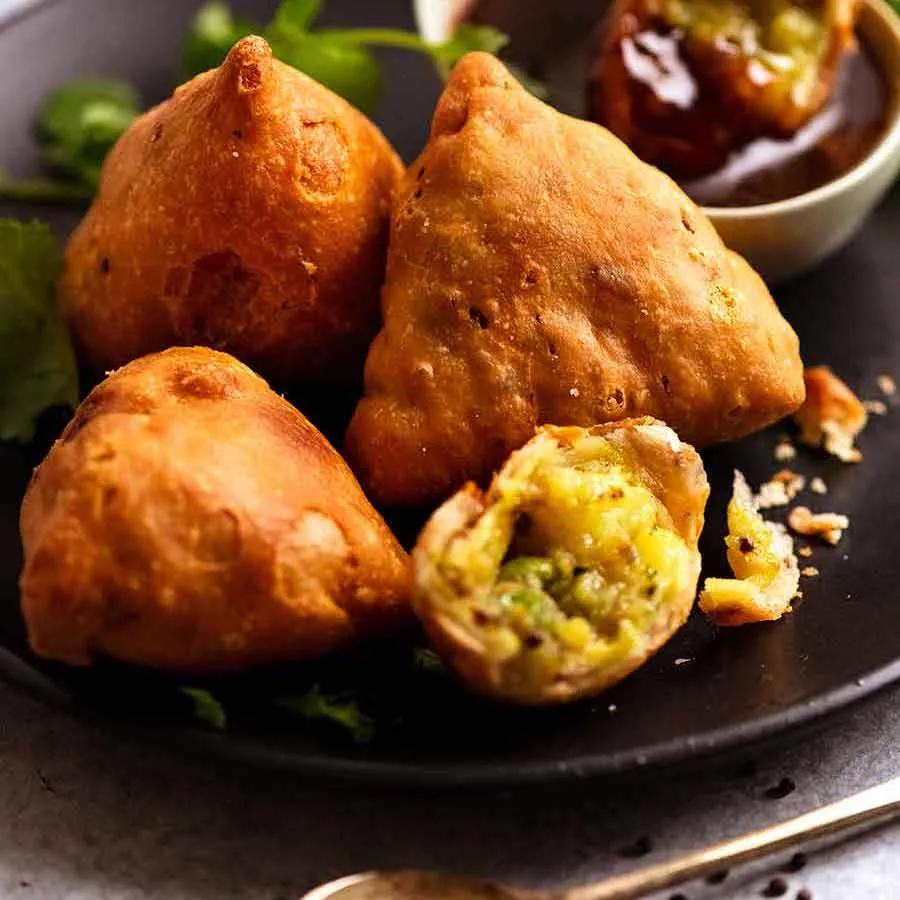

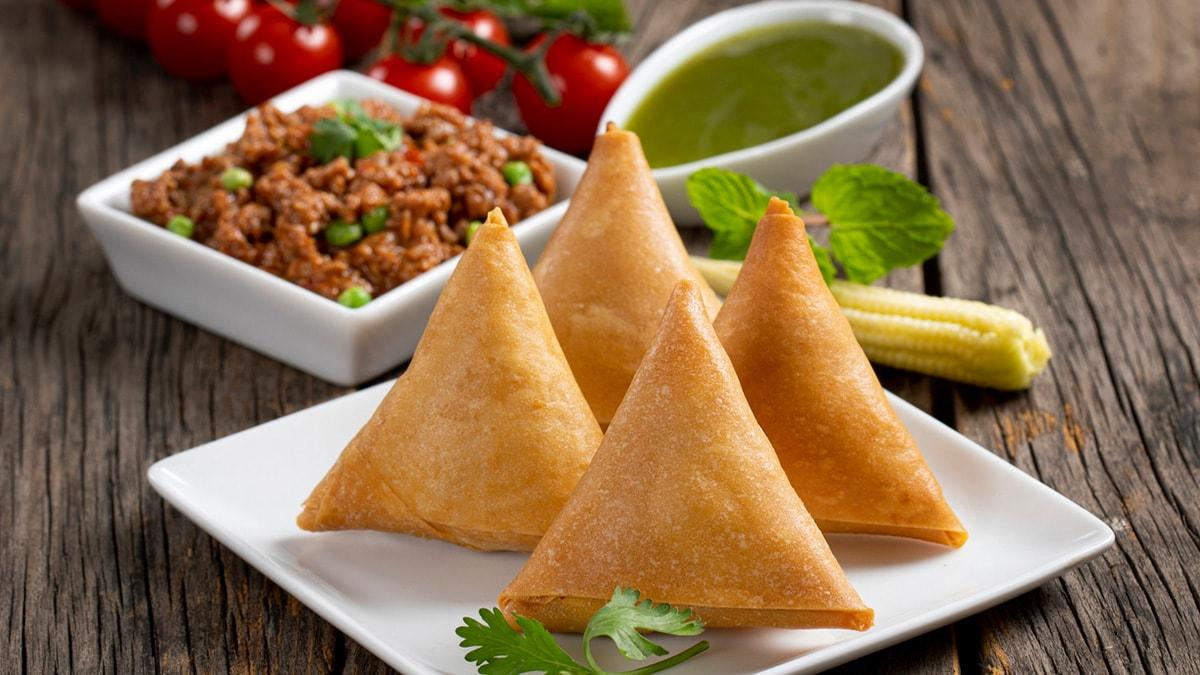

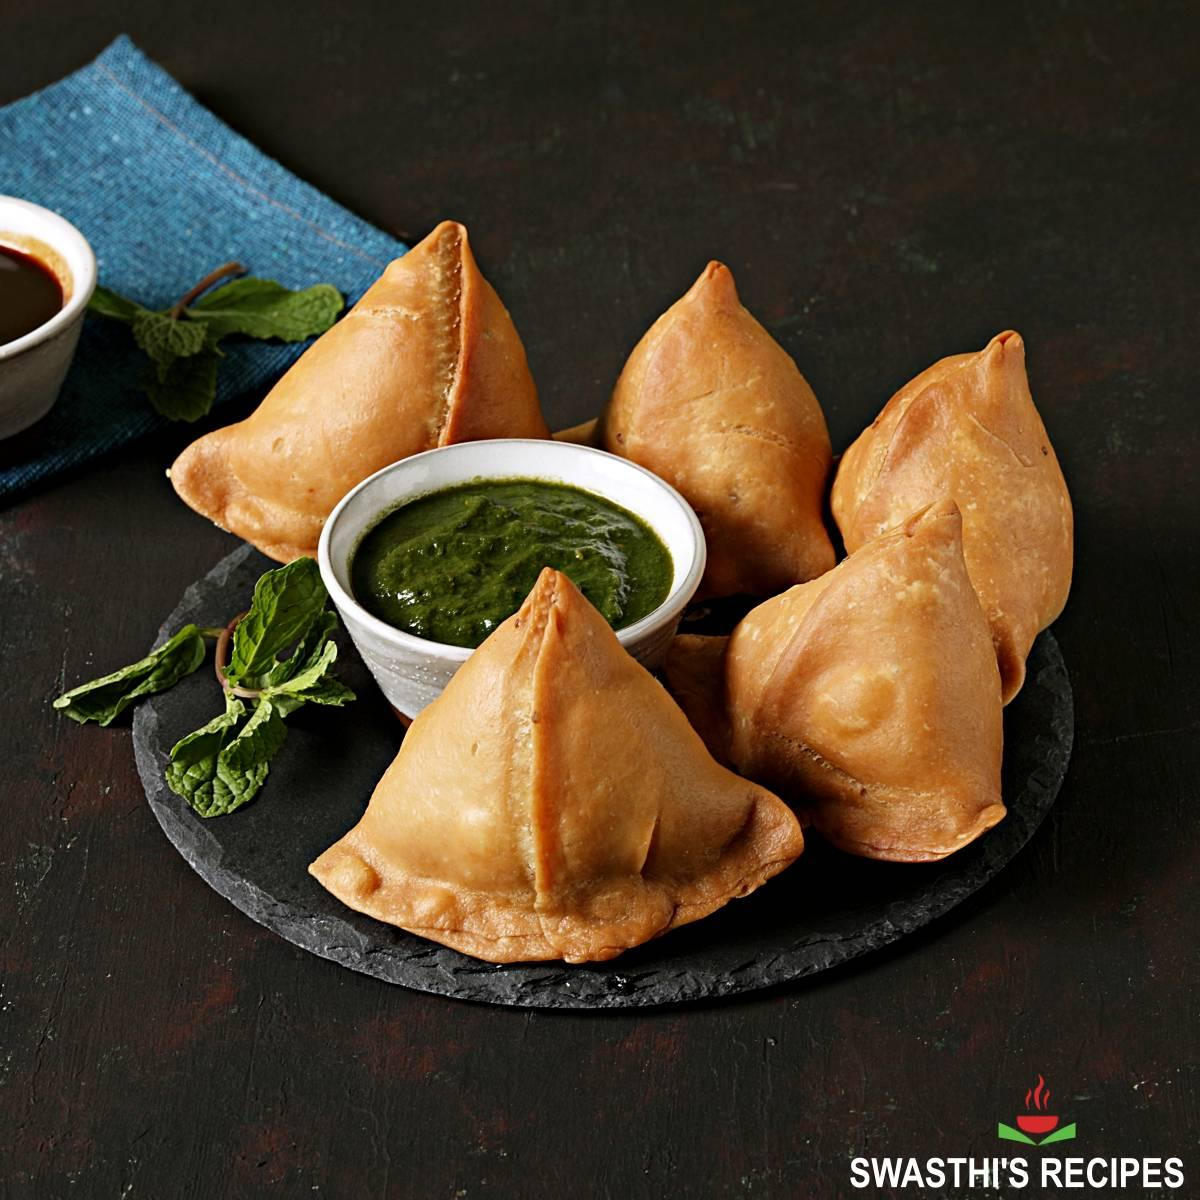

Images for row 14:


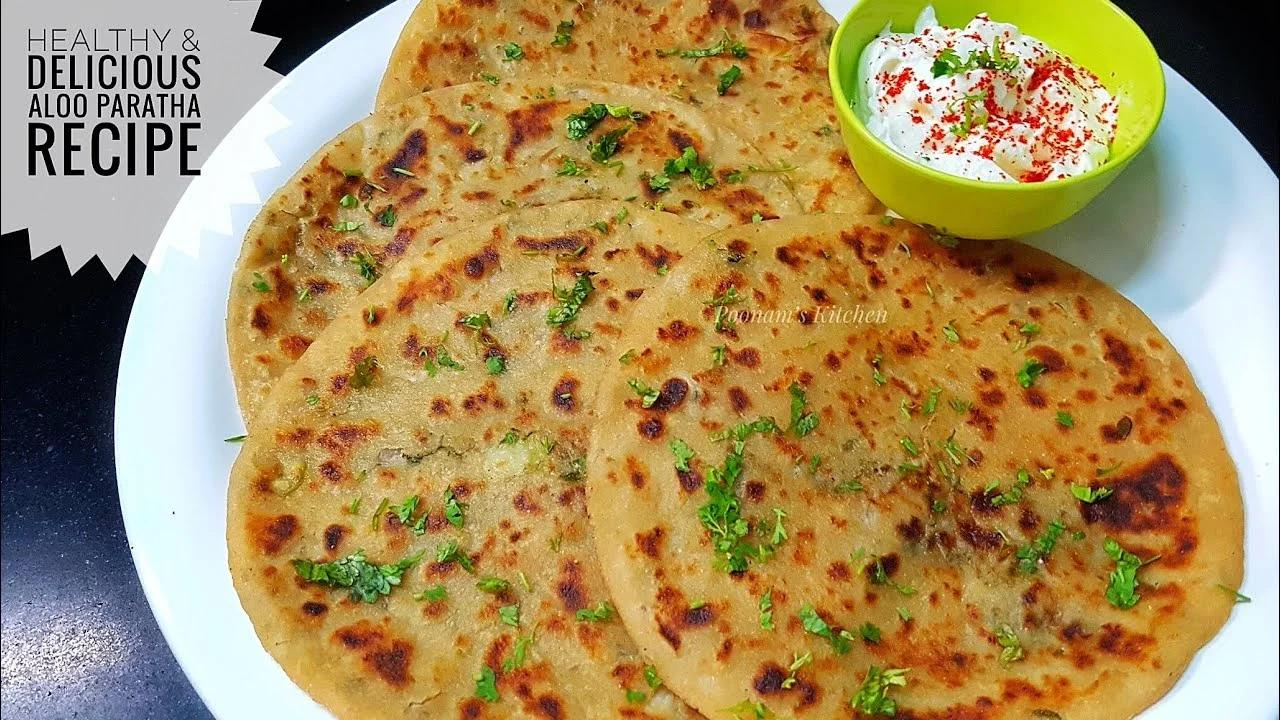

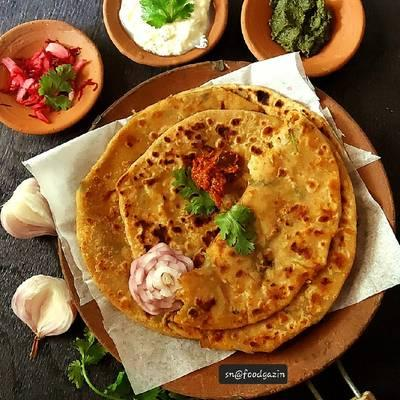

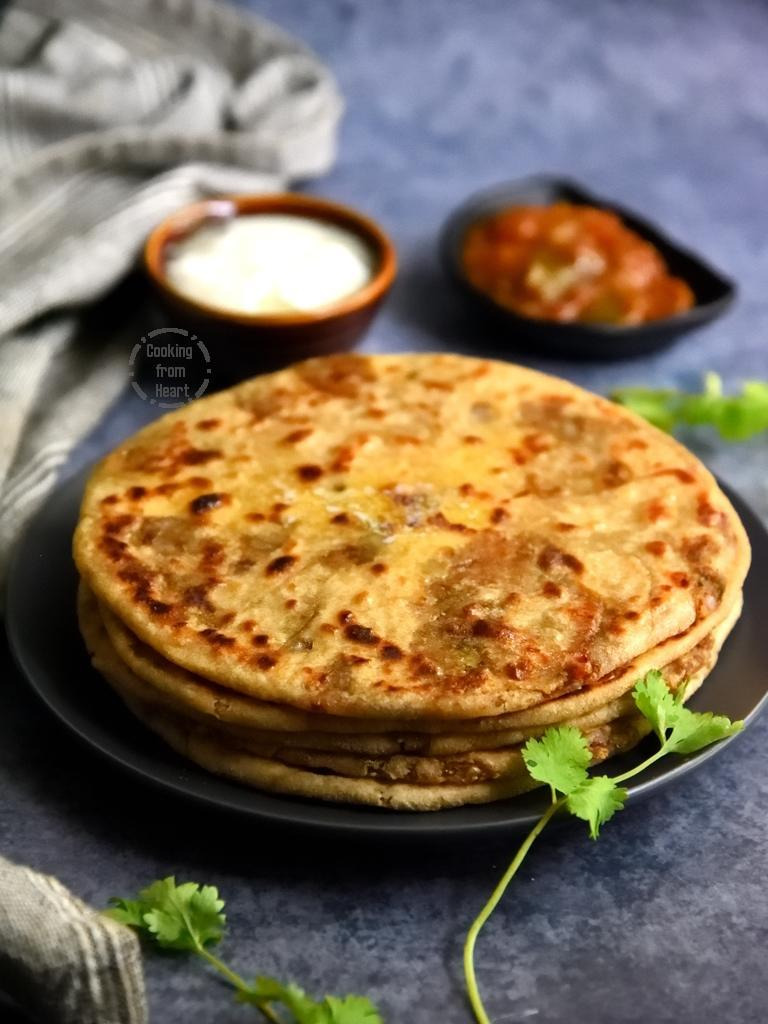

In [9]:
from IPython.display import Image, display
for idx, row in dff.iterrows():
    print(f"Images for row {idx}:")
    for col in dff.columns:
        display(Image(filename=row[col]))



In [10]:
dff.head(100)

image_1                        image_2  \
0     images/Chocolate_Cake_1.jpg    images/Chocolate_Cake_2.jpg   
1              images/Momos_1.jpg             images/Momos_2.jpg   
2   images/Chicken_Tandoori_1.jpg  images/Chicken_Tandoori_2.jpg   
3            images/Biryani_1.jpg           images/Biryani_2.jpg   
4              images/Pizza_1.jpg             images/Pizza_2.jpg   
5             images/Burger_1.jpg            images/Burger_2.jpg   
6        images/Mango_Shake_1.jpg       images/Mango_Shake_2.jpg   
7            images/Noodles_1.jpg           images/Noodles_2.jpg   
8       images/French_Fries_1.jpg      images/French_Fries_2.jpg   
9         images/Boiled_Egg_1.jpg        images/Boiled_Egg_2.jpg   
10          images/Sandwich_1.jpg          images/Sandwich_2.jpg   
11             images/Curry_1.jpg             images/Curry_2.jpg   
12      images/Masala_Pasta_1.jpg      images/Masala_Pasta_2.jpg   
13            images/Samosa_1.jpg            images/Samosa_2.jpg   
14      images/Aloo_Paratha_1.jpg      images/Aloo_Paratha_2.jpg   

                          image_3  
0     images/Chocolate_Cake_3.jpg  
1              images/Momos_3.jpg  
2   images/Chicken_Tandoori_3.jpg  
3            images/Biryani_3.jpg  
4              images/Pizza_3.jpg  
5             images/Burger_3.jpg  
6        images/Mango_Shake_3.jpg  
7            images/Noodles_3.jpg  
8       images/French_Fries_3.jpg  
9         images/Boiled_Egg_3.jpg  
10          images/Sandwich_3.jpg  
11             images/Curry_3.jpg  
12      images/Masala_Pasta_3.jpg  
13            images/Samosa_3.jpg  
14      images/Aloo_Paratha_3.jpg

In [11]:
df.head()

dish_name category   cuisine_type  \
0    Chocolate Cake  Dessert  International   
1             Momos    Asian          Asian   
2  Chicken Tandoori   Indian          Asian   
3           Biryani   Indian          Asian   
4             Pizza  Italian       European   

                                         ingredients  \
0  All-purpose flour:1¾ cups;Sugar:2 cups;Cocoa p...   
1  All-purpose flour:2 cups;Water:⅓ cup;Salt:½ ts...   
2  Chicken quarters:2 lbs;Plain yogurt:1 cup;Ging...   
3  Pilao rice:300g;Chicken:500g, chopped into pie...   
4  Pizza dough:1 ball;Pizza sauce:¼ cup;Mozzarell...   

                                        recipe_steps  \
0  Preheat oven to 350°F (175°C) and grease two 9...   
1  Make dough by mixing flour, salt and lukewarm ...   
2  Preheat oven to 400°F (200°C);In a mixing bowl...   
3  Soak rice in water while preparing other ingre...   
4  Preheat oven to 475°F (245°C);Roll out pizza d...   

                                             image_1  \
0  https://t3.ftcdn.net/jpg/02/10/14/94/360_F_210...   
1  https://images.squarespace-cdn.com/content/v1/...   
2  https://t3.ftcdn.net/jpg/04/68/93/94/360_F_468...   
3  https://assets.cntraveller.in/photos/6218cfdbd...   
4  https://thumbs.dreamstime.com/b/pizza-rustic-i...   

                                             image_2  \
0  https://www.shutterstock.com/image-photo/choco...   
1  https://t3.ftcdn.net/jpg/09/70/22/44/360_F_970...   
2  https://www.yummytummyaarthi.com/wp-content/up...   
3  https://t3.ftcdn.net/jpg/01/14/51/60/360_F_114...   
4  https://marketplace.canva.com/MADapg-tRrc/1/th...   

                                             image_3  
0  https://prettysimplesweet.com/wp-content/uploa...  
1  https://t3.ftcdn.net/jpg/03/98/52/84/360_F_398...  
2  https://i0.wp.com/www.happyandharried.com/wp-c...  
3  https://t3.ftcdn.net/jpg/05/66/68/36/360_F_566...  
4  https://i.pinimg.com/736x/f9/6b/d8/f96bd8d65e3...

In [12]:
df=df.drop(columns=["image_1","image_2","image_3"])

In [13]:
df.head(100)

dish_name        category   cuisine_type  \
0     Chocolate Cake         Dessert  International   
1              Momos           Asian          Asian   
2   Chicken Tandoori          Indian          Asian   
3            Biryani          Indian          Asian   
4              Pizza         Italian       European   
5             Burger        American       American   
6        Mango Shake        Beverage  International   
7            Noodles           Asian          Asian   
8       French Fries        American       American   
9         Boiled Egg   International  International   
10          Sandwich   International  International   
11             Curry          Indian          Asian   
12      Masala Pasta  Italian-Indian         Fusion   
13            Samosa          Indian          Asian   
14      Aloo Paratha          Indian          Asian   

                                          ingredients  \
0   All-purpose flour:1¾ cups;Sugar:2 cups;Cocoa p...   
1   All-purpose flour:2 cups;Water:⅓ cup;Salt:½ ts...   
2   Chicken quarters:2 lbs;Plain yogurt:1 cup;Ging...   
3   Pilao rice:300g;Chicken:500g, chopped into pie...   
4   Pizza dough:1 ball;Pizza sauce:¼ cup;Mozzarell...   
5   Minced beef:500g;Onion:½ medium, diced;Egg:1;S...   
6   Ripe mangoes:2 large, peeled and chopped;Milk:...   
7   Egg noodles:400g;Chicken breast:300g, sliced;V...   
8   Potatoes:4 large;Vegetable oil:for deep frying...   
9   Eggs:4 large;Water:enough to cover eggs;Salt:1...   
10  Bread slices:4;Butter:2 tbsp;Cheese slices:2;H...   
11  Chicken or vegetables:500g;Onions:2 large, cho...   
12  Penne pasta:1½ cups;Olive oil:2½ tbsp;Cumin se...   
13  All-purpose flour:2 cups;Oil:4 tbsp + for deep...   
14  Whole wheat flour:2 cups;Water:¾ cup;Salt:1 ts...   

                                         recipe_steps  
0   Preheat oven to 350°F (175°C) and grease two 9...  
1   Make dough by mixing flour, salt and lukewarm ...  
2   Preheat oven to 400°F (200°C);In a mixing bowl...  
3   Soak rice in water while preparing other ingre...  
4   Preheat oven to 475°F (245°C);Roll out pizza d...  
5   Dice half an onion finely;Add minced beef to m...  
6   Peel and chop ripe mangoes into small pieces;A...  
7   Boil egg noodles according to package instruct...  
8   Wash and peel potatoes;Cut potatoes into unifo...  
9   Place eggs in a single layer in saucepan;Add e...  
10  Toast bread slices until golden brown if desir...  
11  Heat oil in large pan over medium heat;Add cum...  
12  Boil 6 cups water with 1 tsp salt, add pasta a...  
13  Make dough by mixing flour, 4 tbsp oil, salt a...  
14  Make dough by mixing flour, salt, oil and wate...

In [14]:
df_combined = pd.concat([df, dff], axis=1)

# Check result
df_combined.head()

dish_name category   cuisine_type  \
0    Chocolate Cake  Dessert  International   
1             Momos    Asian          Asian   
2  Chicken Tandoori   Indian          Asian   
3           Biryani   Indian          Asian   
4             Pizza  Italian       European   

                                         ingredients  \
0  All-purpose flour:1¾ cups;Sugar:2 cups;Cocoa p...   
1  All-purpose flour:2 cups;Water:⅓ cup;Salt:½ ts...   
2  Chicken quarters:2 lbs;Plain yogurt:1 cup;Ging...   
3  Pilao rice:300g;Chicken:500g, chopped into pie...   
4  Pizza dough:1 ball;Pizza sauce:¼ cup;Mozzarell...   

                                        recipe_steps  \
0  Preheat oven to 350°F (175°C) and grease two 9...   
1  Make dough by mixing flour, salt and lukewarm ...   
2  Preheat oven to 400°F (200°C);In a mixing bowl...   
3  Soak rice in water while preparing other ingre...   
4  Preheat oven to 475°F (245°C);Roll out pizza d...   

                         image_1                        image_2  \
0    images/Chocolate_Cake_1.jpg    images/Chocolate_Cake_2.jpg   
1             images/Momos_1.jpg             images/Momos_2.jpg   
2  images/Chicken_Tandoori_1.jpg  images/Chicken_Tandoori_2.jpg   
3           images/Biryani_1.jpg           images/Biryani_2.jpg   
4             images/Pizza_1.jpg             images/Pizza_2.jpg   

                         image_3  
0    images/Chocolate_Cake_3.jpg  
1             images/Momos_3.jpg  
2  images/Chicken_Tandoori_3.jpg  
3           images/Biryani_3.jpg  
4             images/Pizza_3.jpg

In [15]:
df_combined.head()

dish_name category   cuisine_type  \
0    Chocolate Cake  Dessert  International   
1             Momos    Asian          Asian   
2  Chicken Tandoori   Indian          Asian   
3           Biryani   Indian          Asian   
4             Pizza  Italian       European   

                                         ingredients  \
0  All-purpose flour:1¾ cups;Sugar:2 cups;Cocoa p...   
1  All-purpose flour:2 cups;Water:⅓ cup;Salt:½ ts...   
2  Chicken quarters:2 lbs;Plain yogurt:1 cup;Ging...   
3  Pilao rice:300g;Chicken:500g, chopped into pie...   
4  Pizza dough:1 ball;Pizza sauce:¼ cup;Mozzarell...   

                                        recipe_steps  \
0  Preheat oven to 350°F (175°C) and grease two 9...   
1  Make dough by mixing flour, salt and lukewarm ...   
2  Preheat oven to 400°F (200°C);In a mixing bowl...   
3  Soak rice in water while preparing other ingre...   
4  Preheat oven to 475°F (245°C);Roll out pizza d...   

                         image_1                        image_2  \
0    images/Chocolate_Cake_1.jpg    images/Chocolate_Cake_2.jpg   
1             images/Momos_1.jpg             images/Momos_2.jpg   
2  images/Chicken_Tandoori_1.jpg  images/Chicken_Tandoori_2.jpg   
3           images/Biryani_1.jpg           images/Biryani_2.jpg   
4             images/Pizza_1.jpg             images/Pizza_2.jpg   

                         image_3  
0    images/Chocolate_Cake_3.jpg  
1             images/Momos_3.jpg  
2  images/Chicken_Tandoori_3.jpg  
3           images/Biryani_3.jpg  
4             images/Pizza_3.jpg

In [16]:
df=df_combined

In [17]:
df.head(100)

dish_name        category   cuisine_type  \
0     Chocolate Cake         Dessert  International   
1              Momos           Asian          Asian   
2   Chicken Tandoori          Indian          Asian   
3            Biryani          Indian          Asian   
4              Pizza         Italian       European   
5             Burger        American       American   
6        Mango Shake        Beverage  International   
7            Noodles           Asian          Asian   
8       French Fries        American       American   
9         Boiled Egg   International  International   
10          Sandwich   International  International   
11             Curry          Indian          Asian   
12      Masala Pasta  Italian-Indian         Fusion   
13            Samosa          Indian          Asian   
14      Aloo Paratha          Indian          Asian   

                                          ingredients  \
0   All-purpose flour:1¾ cups;Sugar:2 cups;Cocoa p...   
1   All-purpose flour:2 cups;Water:⅓ cup;Salt:½ ts...   
2   Chicken quarters:2 lbs;Plain yogurt:1 cup;Ging...   
3   Pilao rice:300g;Chicken:500g, chopped into pie...   
4   Pizza dough:1 ball;Pizza sauce:¼ cup;Mozzarell...   
5   Minced beef:500g;Onion:½ medium, diced;Egg:1;S...   
6   Ripe mangoes:2 large, peeled and chopped;Milk:...   
7   Egg noodles:400g;Chicken breast:300g, sliced;V...   
8   Potatoes:4 large;Vegetable oil:for deep frying...   
9   Eggs:4 large;Water:enough to cover eggs;Salt:1...   
10  Bread slices:4;Butter:2 tbsp;Cheese slices:2;H...   
11  Chicken or vegetables:500g;Onions:2 large, cho...   
12  Penne pasta:1½ cups;Olive oil:2½ tbsp;Cumin se...   
13  All-purpose flour:2 cups;Oil:4 tbsp + for deep...   
14  Whole wheat flour:2 cups;Water:¾ cup;Salt:1 ts...   

                                         recipe_steps  \
0   Preheat oven to 350°F (175°C) and grease two 9...   
1   Make dough by mixing flour, salt and lukewarm ...   
2   Preheat oven to 400°F (200°C);In a mixing bowl...   
3   Soak rice in water while preparing other ingre...   
4   Preheat oven to 475°F (245°C);Roll out pizza d...   
5   Dice half an onion finely;Add minced beef to m...   
6   Peel and chop ripe mangoes into small pieces;A...   
7   Boil egg noodles according to package instruct...   
8   Wash and peel potatoes;Cut potatoes into unifo...   
9   Place eggs in a single layer in saucepan;Add e...   
10  Toast bread slices until golden brown if desir...   
11  Heat oil in large pan over medium heat;Add cum...   
12  Boil 6 cups water with 1 tsp salt, add pasta a...   
13  Make dough by mixing flour, 4 tbsp oil, salt a...   
14  Make dough by mixing flour, salt, oil and wate...   

                          image_1                        image_2  \
0     images/Chocolate_Cake_1.jpg    images/Chocolate_Cake_2.jpg   
1              images/Momos_1.jpg             images/Momos_2.jpg   
2   images/Chicken_Tandoori_1.jpg  images/Chicken_Tandoori_2.jpg   
3            images/Biryani_1.jpg           images/Biryani_2.jpg   
4              images/Pizza_1.jpg             images/Pizza_2.jpg   
5             images/Burger_1.jpg            images/Burger_2.jpg   
6        images/Mango_Shake_1.jpg       images/Mango_Shake_2.jpg   
7            images/Noodles_1.jpg           images/Noodles_2.jpg   
8       images/French_Fries_1.jpg      images/French_Fries_2.jpg   
9         images/Boiled_Egg_1.jpg        images/Boiled_Egg_2.jpg   
10          images/Sandwich_1.jpg          images/Sandwich_2.jpg   
11             images/Curry_1.jpg             images/Curry_2.jpg   
12      images/Masala_Pasta_1.jpg      images/Masala_Pasta_2.jpg   
13            images/Samosa_1.jpg            images/Samosa_2.jpg   
14      images/Aloo_Paratha_1.jpg      images/Aloo_Paratha_2.jpg   

                          image_3  
0     images/Chocolate_Cake_3.jpg  
1              images/Momos_3.jpg  
2   images/Chicken_Tandoori_3.jpg  
3            images/Biryani_3.jpg  
4              images/Pizza_3.jpg  

In [18]:
df["dish_name"]

0       Chocolate Cake
1                Momos
2     Chicken Tandoori
3              Biryani
4                Pizza
5               Burger
6          Mango Shake
7              Noodles
8         French Fries
9           Boiled Egg
10            Sandwich
11               Curry
12        Masala Pasta
13              Samosa
14        Aloo Paratha
Name: dish_name, dtype: object

In [19]:
import pandas as pd
import os

# Assume df is your existing DataFrame with 200+ entries
# It should have columns: dish_name, category, cuisine_type, ingredients, recipe_steps, image_1, image_2, image_3
# Example: df = pd.read_csv('your_dataset.csv')  # Load your dataset here
# For testing, pass your actual df to the main function

# Recipe Generator Class
class RecipeGenerator:
    def __init__(self, dataframe):
        self.df = dataframe
        self.image_to_dish = self._build_image_mapping()

    def _build_image_mapping(self):
        """Map image paths from image_1, image_2, image_3 to dish names."""
        image_map = {}
        for _, row in self.df.iterrows():
            dish = row['dish_name']
            for img_col in ['image_1', 'image_2', 'image_3']:
                if pd.notna(row[img_col]):
                    # Normalize image path to avoid case or slash issues
                    normalized_path = os.path.normpath(row[img_col]).replace('\\', '/')
                    image_map[normalized_path] = dish
        return image_map

    def get_valid_image_paths(self):
        """Return all valid image paths in the dataset for debugging."""
        valid_images = pd.concat([self.df['image_1'], self.df['image_2'], self.df['image_3']]).dropna().unique()
        return [os.path.normpath(path).replace('\\', '/') for path in valid_images]

    def get_recipe_by_image(self, image_path):
        """Retrieve recipe based on image path from image_1, image_2, or image_3."""
        # Normalize input image path
        image_path = os.path.normpath(image_path).replace('\\', '/')
        dish_name = self.image_to_dish.get(image_path)
        if not dish_name:
            valid_paths = self.get_valid_image_paths()
            return {
                "error": f"Image path '{image_path}' not found in dataset.",
                "valid_paths_sample": valid_paths[:10],  # Show first 10 valid paths
                "suggestion": "Check case sensitivity or path format."
            }
        
        # Fetch recipe details
        recipe_row = self.df[self.df['dish_name'] == dish_name].iloc[0]
        return {
            'dish_name': recipe_row['dish_name'],
            'category': recipe_row['category'],
            'cuisine_type': recipe_row['cuisine_type'],
            'ingredients': recipe_row['ingredients'].split(';') if pd.notna(recipe_row['ingredients']) else [],
            'recipe_steps': recipe_row['recipe_steps'].split('. ') if pd.notna(recipe_row['recipe_steps']) else []
        }

# Placeholder for your trained image classification model
def classify_image(image_path):
    """Simulate image classification using dataset image paths."""
    # Replace with your actual trained model
    image_path = os.path.normpath(image_path).replace('\\', '/')
    valid_images = pd.concat([df['image_1'], df['image_2'], df['image_3']]).dropna().unique()
    valid_images = [os.path.normpath(path).replace('\\', '/') for path in valid_images]
    if image_path in valid_images:
        return image_path
    return None

# Example usage
def main(df, test_image_path):
    # Initialize generator with your DataFrame
    generator = RecipeGenerator(df)
    
    # Test with the provided image path
    classified_image = classify_image(test_image_path)
    if classified_image:
        recipe = generator.get_recipe_by_image(classified_image)
        print("Recipe from Image:")
        print(pd.Series(recipe).to_json(indent=2))
    else:
        print(f"Error: Image path '{test_image_path}' not recognized.")
        valid_paths = generator.get_valid_image_paths()
        print("Valid image paths (first 10):", valid_paths[:10])
        print("Suggestion: Ensure the path matches exactly (case-sensitive, correct slashes).")

# Example test (replace with your actual DataFrame and image path)
if __name__ == "__main__":
    
    test_image = 'images/Samosa_1.jpg'  # Replace with your actual image path
    main(df, test_image)

Recipe from Image:
{
  "dish_name":"Samosa",
  "category":"Indian",
  "cuisine_type":"Asian",
  "ingredients":[
    "All-purpose flour:2 cups",
    "Oil:4 tbsp + for deep frying",
    "Salt:1 tsp",
    "Water:6-7 tbsp",
    "Potatoes:4 large, boiled and cubed",
    "Green peas:\u00bd cup",
    "Onions:1 medium, finely chopped",
    "Ginger:1 tbsp, grated",
    "Green chilies:2, finely chopped",
    "Cumin seeds:1 tsp",
    "Coriander seeds:1 tsp",
    "Turmeric powder:\u00bd tsp",
    "Red chili powder:1 tsp",
    "Garam masala:1 tsp",
    "Coriander leaves:2 tbsp, chopped",
    "Lemon juice:1 tbsp"
  ],
  "recipe_steps":[
    "Make dough by mixing flour, 4 tbsp oil, salt and water until smooth;Cover and rest for 30 minutes;Heat 2 tbsp oil in pan, add cumin and coriander seeds;Add chopped onions and saut\u00e9 until golden;Add ginger and green chilies, cook for 1 minute;Add boiled potatoes and green peas;Add turmeric, red chili powder, garam masala and salt;Mix well and cook for 5 minu

In [20]:
import pandas as pd
import os
import pickle
from sklearn.base import BaseEstimator, TransformerMixin

# Assume df is your existing DataFrame with 200+ entries
# Replace with your actual DataFrame loading
# Example: df = pd.read_csv('your_dataset.csv')


# Save DataFrame to pickle
dataset_pickle_path = 'recipes_dataset.pkl'
df.to_pickle(dataset_pickle_path)
print(f"Dataset saved as: {dataset_pickle_path}")

# Placeholder for your trained image classification model
class ImageClassifier(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Replace with your actual trained model
        self.model = None  # Example: load_model('path_to_your_model.h5')
        self.dish_names = df['dish_name'].unique().tolist()

    def fit(self, X, y=None):
        # No fitting needed for pre-trained model
        return self

    def transform(self, X):
        # X is a list of image paths
        predictions = []
        for image_path in X:
            image_path = os.path.normpath(image_path).replace('\\', '/')
            # Replace with your model's inference
            # Example: Simulate classification by checking dataset paths
            valid_images = pd.concat([df['image_1'], df['image_2'], df['image_3']]).dropna().unique()
            valid_images = [os.path.normpath(path).replace('\\', '/') for path in valid_images]
            if image_path in valid_images:
                predictions.append(image_path)
            else:
                predictions.append(None)
        return predictions

# Recipe Generator Class
class RecipeGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, pickle_path):
        self.df = pd.read_pickle(pickle_path)
        self.image_to_dish = self._build_image_mapping()

    def _build_image_mapping(self):
        image_map = {}
        for _, row in self.df.iterrows():
            dish = row['dish_name']
            for img_col in ['image_1', 'image_2', 'image_3']:
                if pd.notna(row[img_col]):
                    normalized_path = os.path.normpath(row[img_col]).replace('\\', '/')
                    image_map[normalized_path] = dish
        return image_map

    def get_valid_image_paths(self):
        valid_images = pd.concat([self.df['image_1'], self.df['image_2'], self.df['image_3']]).dropna().unique()
        return [os.path.normpath(path).replace('\\', '/') for path in valid_images]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        results = []
        for image_path in X:
            if image_path is None:
                valid_paths = self.get_valid_image_paths()
                results.append({
                    "error": f"Image path not recognized.",
                    "valid_paths_sample": valid_paths[:10],
                    "suggestion": "Ensure the path matches dataset (case-sensitive, correct slashes)."
                })
                continue
            image_path = os.path.normpath(image_path).replace('\\', '/')
            dish_name = self.image_to_dish.get(image_path)
            if not dish_name:
                valid_paths = self.get_valid_image_paths()
                results.append({
                    "error": f"Image path '{image_path}' not found in dataset.",
                    "valid_paths_sample": valid_paths[:10],
                    "suggestion": "Check case sensitivity or path format."
                })
            else:
                recipe_row = self.df[self.df['dish_name'] == dish_name].iloc[0]
                results.append({
                    'dish_name': recipe_row['dish_name'],
                    'category': recipe_row['category'],
                    'cuisine_type': recipe_row['cuisine_type'],
                    'ingredients': recipe_row['ingredients'].split(';') if pd.notna(recipe_row['ingredients']) else [],
                    'recipe_steps': recipe_row['recipe_steps'].split('. ') if pd.notna(recipe_row['recipe_steps']) else []
                })
        return results

# Create pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('classifier', ImageClassifier()),
    ('recipe_generator', RecipeGenerator(dataset_pickle_path))
])

# Save pipeline to pickle
pipeline_pickle_path = 'image_to_recipe_pipeline.pkl'
with open(pipeline_pickle_path, 'wb') as f:
    pickle.dump(pipeline, f)
print(f"Pipeline saved as: {pipeline_pickle_path}")

# Example usage
def main(pipeline_path, test_image_path):
    # Load pipeline
    with open(pipeline_path, 'rb') as f:
        loaded_pipeline = pickle.load(f)
    
    # Test with image path
    result = loaded_pipeline.transform([test_image_path])[0]
    print("Recipe from Image:")
    print(pd.Series(result).to_json(indent=2))
    
    # Debug if error
    if 'error' in result:
        similar_paths = [path for path in loaded_pipeline.steps[1][1].get_valid_image_paths() if test_image_path.lower() in path.lower()]
        if similar_paths:
            print("Similar paths found:", similar_paths)

if __name__ == "__main__":
    test_image = 'images/pizza_1.jpg'
    main(pipeline_pickle_path, test_image)

Dataset saved as: recipes_dataset.pkl
Pipeline saved as: image_to_recipe_pipeline.pkl
Recipe from Image:
{
  "error":"Image path not recognized.",
  "valid_paths_sample":[
    "images\/Chocolate_Cake_1.jpg",
    "images\/Momos_1.jpg",
    "images\/Chicken_Tandoori_1.jpg",
    "images\/Biryani_1.jpg",
    "images\/Pizza_1.jpg",
    "images\/Burger_1.jpg",
    "images\/Mango_Shake_1.jpg",
    "images\/Noodles_1.jpg",
    "images\/French_Fries_1.jpg",
    "images\/Boiled_Egg_1.jpg"
  ],
  "suggestion":"Ensure the path matches dataset (case-sensitive, correct slashes)."
}
Similar paths found: ['images/Pizza_1.jpg']


C:\Users\gauta\AppData\Roaming\Python\Python312\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [21]:
import pandas as pd
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np

# Custom Dataset for your images
class DishDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.dish_to_idx = {dish: idx for idx, dish in enumerate(df['dish_name'].unique())}
        
        # Collect all valid image paths and labels
        for _, row in df.iterrows():
            for col in ['image_1', 'image_2', 'image_3']:
                if pd.notna(row[col]):
                    img_path = os.path.normpath(row[col]).replace('\\', '/')
                    if os.path.exists(img_path):
                        self.image_paths.append(img_path)
                        self.labels.append(self.dish_to_idx[row['dish_name']])
                    else:
                        print(f"Warning: Image path not found: {img_path}")
        print(f"Total valid images loaded: {len(self.image_paths)}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Recipe Generator Class (partial, focusing on training)
class RecipeGenerator:
    def __init__(self, dataframe):
        self.df = dataframe
        self.dish_names = dataframe['dish_name'].unique()
        self.model = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    def train_model(self, epochs=10, batch_size=32):
        """Train ResNet18 on dataset images."""
        # Prepare dataset and dataloader
        dataset = DishDataset(self.df, transform=self.transform)
        if len(dataset) == 0:
            raise ValueError("No valid images found in dataset. Check image paths.")
        
        # Stratified split to ensure class balance in train and validation sets
        train_idx, val_idx = train_test_split(
            range(len(dataset)), 
            test_size=0.2, 
            stratify=dataset.labels, 
            random_state=42
        )
        train_dataset = torch.utils.data.Subset(dataset, train_idx)
        val_dataset = torch.utils.data.Subset(dataset, val_idx)
        
        print(f"Training set size: {len(train_dataset)}, Validation set size: {len(val_dataset)}")
        
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        
        # Load pre-trained ResNet18
        self.model = models.resnet18(weights='IMAGENET1K_V1')  # Updated from deprecated 'pretrained'
        num_classes = len(self.dish_names)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
        self.model = self.model.to(self.device)
        
        # Define loss and optimizer with class weights to handle imbalance
        class_counts = np.bincount(dataset.labels)
        class_weights = 1.0 / (class_counts + 1e-6)  # Avoid division by zero
        class_weights = torch.tensor(class_weights, dtype=torch.float).to(self.device)
        criterion = nn.CrossEntropyLoss(weight=class_weights)
        optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        
        # Training loop
        for epoch in range(epochs):
            self.model.train()
            running_loss = 0.0
            for images, labels in train_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                optimizer.zero_grad()
                outputs = self.model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            
            # Validation
            self.model.eval()
            correct = 0
            total = 0
            with torch.no_grad():
                for images, labels in val_loader:
                    images, labels = images.to(self.device), labels.to(self.device)
                    outputs = self.model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
            
            val_accuracy = 100 * correct / total if total > 0 else 0
            print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Val Accuracy: {val_accuracy:.2f}%")
        
        # Save model
        torch.save(self.model.state_dict(), 'dish_classifier.pt')


In [22]:
import pandas as pd
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import train_test_split
import numpy as np

# Custom Dataset for loading dish images
class DishDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.dish_to_idx = {dish: idx for idx, dish in enumerate(df['dish_name'].unique())}
        self.idx_to_dish = {idx: dish for dish, idx in self.dish_to_idx.items()}
        
        # Collect all valid image paths and labels
        for _, row in df.iterrows():
            for col in ['image_1', 'image_2', 'image_3']:
                if col in df.columns and pd.notna(row[col]):
                    img_path = os.path.normpath(row[col]).replace('\\', '/')
                    if os.path.exists(img_path):
                        self.image_paths.append(img_path)
                        self.labels.append(self.dish_to_idx[row['dish_name']])
                    else:
                        print(f"Warning: Image path not found: {img_path}")
        print(f"Total valid images loaded: {len(self.image_paths)}")
        print(f"Class distribution: {np.bincount(self.labels) if self.labels else 'No labels'}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Utility function for safe dataset splitting
def safe_split_dataset(dataset, test_size=0.2, random_state=42, split_type="train_val"):
    """Safely split dataset with or without stratification based on class distribution."""
    if len(dataset) < 2:
        print(f"Dataset too small to split ({len(dataset)} samples). Using full dataset for training.")
        return dataset, Subset(dataset, [])
    
    indices = np.arange(len(dataset))
    labels = np.array(dataset.labels) if hasattr(dataset, 'labels') else None
    
    # Check if stratification is possible
    if labels is not None and len(np.unique(labels)) > 1:
        class_counts = np.bincount(labels)
        if np.min(class_counts[class_counts > 0]) < 2:
            print(f"Warning: Some classes have fewer than 2 samples. Falling back to non-stratified split for {split_type}.")
            train_idx, test_idx = train_test_split(indices, test_size=test_size, random_state=random_state)
        else:
            try:
                train_idx, test_idx = train_test_split(
                    indices, test_size=test_size, stratify=labels, random_state=random_state
                )
            except ValueError as e:
                print(f"Stratified split failed for {split_type}: {e}. Falling back to non-stratified split.")
                train_idx, test_idx = train_test_split(indices, test_size=test_size, random_state=random_state)
    else:
        print(f"No labels or single class for {split_type}. Using non-stratified split.")
        train_idx, test_idx = train_test_split(indices, test_size=test_size, random_state=random_state)
    
    train_subset = Subset(dataset, train_idx)
    test_subset = Subset(dataset, test_idx)
    print(f"{split_type.capitalize()} split - Train set size: {len(train_subset)}, Test/Validation set size: {len(test_subset)}")
    return train_subset, test_subset

# Recipe Generator Class for training, testing, and prediction
class RecipeGenerator:
    def __init__(self, dataframe):
        self.df = dataframe
        self.dish_names = dataframe['dish_name'].unique()
        self.model = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.train_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        self.test_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        self.idx_to_dish = {idx: dish for idx, dish in enumerate(self.dish_names)}

    def train_model(self, epochs=10, batch_size=32):
        """Train ResNet18 on dataset images."""
        dataset = DishDataset(self.df, transform=self.train_transform)
        if len(dataset) == 0:
            raise ValueError("No valid images found in dataset. Check image paths.")
        
        # Split dataset into train and validation
        train_dataset, val_dataset = safe_split_dataset(dataset, test_size=0.2, random_state=42, split_type="train_val")
        
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False) if len(val_dataset) > 0 else None
        
        # Load pre-trained ResNet18
        self.model = models.resnet18(weights='IMAGENET1K_V1')
        num_classes = len(self.dish_names)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
        self.model = self.model.to(self.device)
        
        # Define loss with class weights to handle imbalance
        class_counts = np.bincount(dataset.labels) if dataset.labels else np.ones(num_classes)
        class_weights = 1.0 / (class_counts + 1e-6)
        class_weights = torch.tensor(class_weights, dtype=torch.float).to(self.device)
        criterion = nn.CrossEntropyLoss(weight=class_weights)
        optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        
        # Training loop
        for epoch in range(epochs):
            self.model.train()
            running_loss = 0.0
            for images, labels in train_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                optimizer.zero_grad()
                outputs = self.model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            
            # Validation if available
            val_accuracy = 0.0
            if val_loader:
                self.model.eval()
                correct = 0
                total = 0
                with torch.no_grad():
                    for images, labels in val_loader:
                        images, labels = images.to(self.device), labels.to(self.device)
                        outputs = self.model(images)
                        _, predicted = torch.max(outputs.data, 1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()
                val_accuracy = 100 * correct / total if total > 0 else 0
            
            print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Val Accuracy: {val_accuracy:.2f}%")
        
        # Save model
        torch.save(self.model.state_dict(), 'dish_classifier.pt')

    def load_model(self, model_path='dish_classifier.pt'):
        """Load the trained model from a file."""
        if self.model is None:
            self.model = models.resnet18(weights=None)
            num_classes = len(self.dish_names)
            self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
            self.model.load_state_dict(torch.load(model_path))
            self.model = self.model.to(self.device)
            self.model.eval()
        return self.model

    def predict_image(self, image_path):
        """Predict the dish name from a single image."""
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image not found at: {image_path}")
        
        image = Image.open(image_path).convert('RGB')
        image = self.test_transform(image).unsqueeze(0).to(self.device)
        
        self.load_model()
        
        with torch.no_grad():
            output = self.model(image)
            probabilities = torch.softmax(output, dim=1)
            confidence, predicted_idx = torch.max(probabilities, dim=1)
            predicted_dish = self.idx_to_dish[predicted_idx.item()]
            confidence_score = confidence.item()
        
        return predicted_dish, confidence_score

    def test_model(self, test_size=0.1, batch_size=32):
        """Evaluate the model on a test dataset."""
        dataset = DishDataset(self.df, transform=self.test_transform)
        if len(dataset) == 0:
            raise ValueError("No valid images found in test dataset.")
        
        # Split dataset into train (unused here) and test
        _, test_subset = safe_split_dataset(dataset, test_size=test_size, random_state=42, split_type="test")
        if len(test_subset) == 0:
            print("Test set is empty due to small dataset size. Using full dataset for testing.")
            test_subset = dataset
        
        test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)
        self.load_model()
        
        correct = 0
        total = 0
        print("Evaluating model on test set...")
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self.model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        test_accuracy = 100 * correct / total if total > 0 else 0
        print(f"Test Accuracy: {test_accuracy:.2f}%")
        return test_accuracy

    def get_recipe(self, dish_name):
        """Retrieve recipe information for a predicted dish (placeholder)."""
        recipe_row = self.df[self.df['dish_name'] == dish_name]
        if not recipe_row.empty:
            return {
                'dish_name': dish_name,
                'ingredients': recipe_row['ingredients'].iloc[0] if 'ingredients' in recipe_row.columns else "Not available",
                'recipe': recipe_row['recipe'].iloc[0] if 'recipe' in recipe_row.columns else "Not available"
            }
        return {"dish_name": dish_name, "ingredients": "Not available", "recipe": "Not available"}

# Example usage
if __name__ == "__main__":
    # Placeholder DataFrame (replace with your actual DataFrame)
    dish_names = ['Chocolate Cake', 'Momos', 'Chicken Tandoori', 'Biryani', 'Pizza', 
                  'Burger', 'Mango Shake', 'Noodles', 'French Fries', 'Boiled Egg']
    df = pd.DataFrame({
        'dish_name': dish_names,
        'image_1': [f"images/{name.replace(' ', '_')}_1.jpg" for name in dish_names],
        'image_2': [f"images/{name.replace(' ', '_')}_2.jpg" for name in dish_names],
        'image_3': [f"images/{name.replace(' ', '_')}_3.jpg" for name in dish_names]
    })
    
    generator = RecipeGenerator(df)
    
    # Train the model
    generator.train_model(epochs=10, batch_size=4)  # Reduced batch size for small dataset
    
    # Test the model
    generator.test_model(test_size=0.2, batch_size=4)
    
    # Predict on a new image (replace with actual path)
    try:
        test_image_path = "images/Pizza_1.jpg"  # Example path
        predicted_dish, confidence = generator.predict_image(test_image_path)
        print(f"Predicted: {predicted_dish} (Confidence: {confidence:.2f})")
        
        # Get recipe for the predicted dish
        recipe_info = generator.get_recipe(predicted_dish)
        print("Recipe Information:")
        print(f"Dish: {recipe_info['dish_name']}")
        print(f"Ingredients: {recipe_info['ingredients']}")
        print(f"Recipe: {recipe_info['recipe']}")
    except FileNotFoundError as e:
        print(e)


Total valid images loaded: 30
Class distribution: [3 3 3 3 3 3 3 3 3 3]
Stratified split failed for train_val: The test_size = 6 should be greater or equal to the number of classes = 10. Falling back to non-stratified split.
Train_val split - Train set size: 24, Test/Validation set size: 6
Epoch 1/10, Loss: 2.3836, Val Accuracy: 0.00%
Epoch 2/10, Loss: 1.0387, Val Accuracy: 33.33%
Epoch 3/10, Loss: 1.3035, Val Accuracy: 16.67%
Epoch 4/10, Loss: 1.0309, Val Accuracy: 0.00%
Epoch 5/10, Loss: 0.5451, Val Accuracy: 16.67%
Epoch 6/10, Loss: 0.8183, Val Accuracy: 0.00%
Epoch 7/10, Loss: 0.7304, Val Accuracy: 16.67%
Epoch 8/10, Loss: 0.4232, Val Accuracy: 33.33%
Epoch 9/10, Loss: 0.5756, Val Accuracy: 16.67%
Epoch 10/10, Loss: 0.8816, Val Accuracy: 66.67%
Total valid images loaded: 30
Class distribution: [3 3 3 3 3 3 3 3 3 3]
Stratified split failed for test: The test_size = 6 should be greater or equal to the number of classes = 10. Falling back to non-stratified split.
Test split - Train se

In [23]:
import pandas as pd
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import train_test_split
import numpy as np

# Custom Dataset for loading dish images (unchanged)
class DishDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.dish_to_idx = {dish: idx for idx, dish in enumerate(df['dish_name'].unique())}
        self.idx_to_dish = {idx: dish for dish, idx in self.dish_to_idx.items()}
        
        for _, row in df.iterrows():
            for col in ['image_1', 'image_2', 'image_3']:
                if col in df.columns and pd.notna(row[col]):
                    img_path = os.path.normpath(row[col]).replace('\\', '/')
                    if os.path.exists(img_path):
                        self.image_paths.append(img_path)
                        self.labels.append(self.dish_to_idx[row['dish_name']])
                    else:
                        print(f"Warning: Image path not found: {img_path}")
        print(f"Total valid images loaded: {len(self.image_paths)}")
        print(f"Class distribution: {np.bincount(self.labels) if self.labels else 'No labels'}")
        print(f"Loaded image paths (first 10 if available): {self.image_paths[:10]}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Utility function for safe dataset splitting (unchanged)
def safe_split_dataset(dataset, test_size=0.2, random_state=42, split_type="train_val"):
    if len(dataset) < 2:
        print(f"Dataset too small to split ({len(dataset)} samples). Using full dataset for training.")
        return dataset, Subset(dataset, [])
    
    indices = np.arange(len(dataset))
    labels = np.array(dataset.labels) if hasattr(dataset, 'labels') else None
    
    if labels is not None and len(np.unique(labels)) > 1:
        class_counts = np.bincount(labels)
        if np.min(class_counts[class_counts > 0]) < 2:
            print(f"Warning: Some classes have fewer than 2 samples. Falling back to non-stratified split for {split_type}.")
            train_idx, test_idx = train_test_split(indices, test_size=test_size, random_state=random_state)
        else:
            try:
                train_idx, test_idx = train_test_split(
                    indices, test_size=test_size, stratify=labels, random_state=random_state
                )
            except ValueError as e:
                print(f"Stratified split failed for {split_type}: {e}. Falling back to non-stratified split.")
                train_idx, test_idx = train_test_split(indices, test_size=test_size, random_state=random_state)
    else:
        print(f"No labels or single class for {split_type}. Using non-stratified split.")
        train_idx, test_idx = train_test_split(indices, test_size=test_size, random_state=random_state)
    
    train_subset = Subset(dataset, train_idx)
    test_subset = Subset(dataset, test_idx)
    print(f"{split_type.capitalize()} split - Train set size: {len(train_subset)}, Test/Validation set size: {len(test_subset)}")
    return train_subset, test_subset

# Recipe Generator Class (get_recipe method unchanged, included for completeness)
class RecipeGenerator:
    def __init__(self, dataframe):
        self.df = dataframe
        self.dish_names = dataframe['dish_name'].unique()
        self.model = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.train_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        self.test_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        self.idx_to_dish = {idx: dish for idx, dish in enumerate(self.dish_names)}

    def train_model(self, epochs=10, batch_size=4):
        dataset = DishDataset(self.df, transform=self.train_transform)
        if len(dataset) == 0:
            raise ValueError("No valid images found in dataset. Check image paths.")
        
        train_dataset, val_dataset = safe_split_dataset(dataset, test_size=0.2, random_state=42, split_type="train_val")
        
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False) if len(val_dataset) > 0 else None
        
        self.model = models.resnet18(weights='IMAGENET1K_V1')
        num_classes = len(self.dish_names)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
        self.model = self.model.to(self.device)
        
        class_counts = np.bincount(dataset.labels) if dataset.labels else np.ones(num_classes)
        class_weights = 1.0 / (class_counts + 1e-6)
        class_weights = torch.tensor(class_weights, dtype=torch.float).to(self.device)
        criterion = nn.CrossEntropyLoss(weight=class_weights)
        optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        
        for epoch in range(epochs):
            self.model.train()
            running_loss = 0.0
            for images, labels in train_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                optimizer.zero_grad()
                outputs = self.model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            
            val_accuracy = 0.0
            if val_loader:
                self.model.eval()
                correct = 0
                total = 0
                with torch.no_grad():
                    for images, labels in val_loader:
                        images, labels = images.to(self.device), labels.to(self.device)
                        outputs = self.model(images)
                        _, predicted = torch.max(outputs.data, 1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()
                val_accuracy = 100 * correct / total if total > 0 else 0
            
            print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Val Accuracy: {val_accuracy:.2f}%")
        
        torch.save(self.model.state_dict(), 'dish_classifier.pt')

    def load_model(self, model_path='dish_classifier.pt'):
        if self.model is None:
            self.model = models.resnet18(weights=None)
            num_classes = len(self.dish_names)
            self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
            self.model.load_state_dict(torch.load(model_path))
            self.model = self.model.to(self.device)
            self.model.eval()
        return self.model

    def predict_image(self, image_path):
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image not found at: {image_path}")
        
        image = Image.open(image_path).convert('RGB')
        image = self.test_transform(image).unsqueeze(0).to(self.device)
        
        self.load_model()
        
        with torch.no_grad():
            output = self.model(image)
            probabilities = torch.softmax(output, dim=1)
            confidence, predicted_idx = torch.max(probabilities, dim=1)
            predicted_dish = self.idx_to_dish[predicted_idx.item()]
            confidence_score = confidence.item()
        
        return predicted_dish, confidence_score

    def test_model(self, test_size=0.2, batch_size=4):
        dataset = DishDataset(self.df, transform=self.test_transform)
        if len(dataset) == 0:
            raise ValueError("No valid images found in test dataset.")
        
        _, test_subset = safe_split_dataset(dataset, test_size=test_size, random_state=42, split_type="test")
        if len(test_subset) == 0:
            print("Test set is empty due to small dataset size. Using full dataset for testing.")
            test_subset = dataset
        
        test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)
        self.load_model()
        
        correct = 0
        total = 0
        print("Evaluating model on test set...")
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self.model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        test_accuracy = 100 * correct / total if total > 0 else 0
        print(f"Test Accuracy: {test_accuracy:.2f}%")
        return test_accuracy

    def get_recipe(self, dish_name):
        """Retrieve recipe information for a predicted dish with checks for column existence."""
        recipe_row = self.df[self.df['dish_name'] == dish_name]
        if recipe_row.empty:
            print(f"Debug: No matching row found for dish_name '{dish_name}' in DataFrame.")
            return {
                'dish_name': dish_name,
                'category': "Not available",
                'cuisine_type': "Not available",
                'ingredients': "Not available",
                'recipe_steps': "Not available"
            }
        else:
            print(f"Debug: Found row for dish_name '{dish_name}'.")
            result = {'dish_name': dish_name}
            for col in ['category', 'cuisine_type', 'ingredients', 'recipe_steps']:
                if col in self.df.columns and not recipe_row[col].isna().iloc[0]:
                    result[col] = recipe_row[col].iloc[0]
                else:
                    result[col] = "Not available"
            return result

# Example usage with updated DataFrame including recipe information
if __name__ == "__main__":
    # Create DataFrame with recipe information for all dishes
    data = {
        'dish_name': ['Chocolate Cake', 'Momos', 'Chicken Tandoori', 'Biryani', 'Pizza', 
                      'Burger', 'Mango Shake', 'Noodles', 'French Fries', 'Boiled Egg'],
        'image_1': [f"images/{name.replace(' ', '_')}_1.jpg" for name in ['Chocolate Cake', 'Momos', 'Chicken Tandoori', 'Biryani', 'Pizza', 
                                                                          'Burger', 'Mango Shake', 'Noodles', 'French Fries', 'Boiled Egg']],
        'image_2': [f"images/{name.replace(' ', '_')}_2.jpg" for name in ['Chocolate Cake', 'Momos', 'Chicken Tandoori', 'Biryani', 'Pizza', 
                                                                          'Burger', 'Mango Shake', 'Noodles', 'French Fries', 'Boiled Egg']],
        'image_3': [f"images/{name.replace(' ', '_')}_3.jpg" for name in ['Chocolate Cake', 'Momos', 'Chicken Tandoori', 'Biryani', 'Pizza', 
                                                                          'Burger', 'Mango Shake', 'Noodles', 'French Fries', 'Boiled Egg']],
        'category': ['Dessert', 'Asian', 'Main Course', 'Main Course', 'Fast Food', 
                     'Fast Food', 'Beverage', 'Asian', 'Snack', 'Snack'],
        'cuisine_type': ['International', 'Asian', 'Indian', 'Indian', 'Italian', 
                         'American', 'International', 'Asian', 'International', 'International'],
        'ingredients': [
            'All-purpose flour:1¾ cups;Sugar:2 cups;Cocoa powder:¾ cup',
            'All-purpose flour:2 cups;Water:⅓ cup;Salt:½ tsp;Chicken:200g',
            'Chicken:1kg;Yogurt:1 cup;Tandoori masala:2 tbsp',
            'Basmati rice:2 cups;Chicken:500g;Biryani masala:2 tbsp',
            'Flour:2 cups;Tomato sauce:1 cup;Cheese:200g',
            'Bun:2 pieces;Beef patty:200g;Lettuce:2 leaves',
            'Mango:2 pieces;Milk:1 cup;Sugar:2 tbsp',
            'Noodles:200g;Soy sauce:2 tbsp;Vegetables:1 cup',
            'Potatoes:500g;Salt:1 tsp;Oil:for frying',
            'Eggs:4;Salt:½ tsp;Water:for boiling'
        ],
        'recipe_steps': [
            'Preheat oven to 350°F (175°C) and grease two 9-inch pans. Mix dry ingredients...',
            'Make dough by mixing flour, salt and lukewarm water. Prepare filling...',
            'Marinate chicken with yogurt and tandoori masala. Grill at 400°F...',
            'Cook rice partially. Layer with marinated chicken and spices. Cook on low heat...',
            'Prepare dough, add toppings, bake at 450°F for 15 minutes...',
            'Grill patty, assemble with bun, lettuce, and condiments...',
            'Blend mango, milk, and sugar. Chill before serving...',
            'Boil noodles, stir-fry with vegetables and soy sauce...',
            'Cut potatoes into strips, fry in hot oil until golden...',
            'Boil eggs in water for 10 minutes, cool and peel...'
        ]
    }
    df = pd.DataFrame(data)

    # Debug DataFrame columns and content
    print("DataFrame Columns:", df.columns.tolist())
    print("DataFrame Image Path Summary:")
    for col in ['image_1', 'image_2', 'image_3']:
        if col in df.columns:
            print(f"{col} - Total paths: {df[col].notna().sum()}, Missing: {df[col].isna().sum()}")
    # Debug recipe columns if they exist
    recipe_cols = ['category', 'cuisine_type', 'ingredients', 'recipe_steps']
    existing_recipe_cols = [col for col in recipe_cols if col in df.columns]
    if existing_recipe_cols:
        print("Recipe Information Summary:")
        for col in existing_recipe_cols:
            print(f"{col} - Total entries: {df[col].notna().sum()}, Missing: {df[col].isna().sum()}")
    else:
        print("Recipe Information Summary: No recipe-related columns found in DataFrame.")

    generator = RecipeGenerator(df)
    
    # Train the model
    generator.train_model(epochs=10, batch_size=4)
    
    # Test the model
    generator.test_model(test_size=0.2, batch_size=4)
    
    # Predict on a new image (replace with actual path)
    try:
        test_image_path = "images/Chocolate_Cake_1.jpg"  # Example path
        predicted_dish, confidence = generator.predict_image(test_image_path)
        print(f"Predicted: {predicted_dish} (Confidence: {confidence:.2f})")
        
        # Get recipe for the predicted dish
        recipe_info = generator.get_recipe(predicted_dish)
        print("Recipe Information:")
        print(f"Dish: {recipe_info['dish_name']}")
        print(f"Category: {recipe_info['category']}")
        print(f"Cuisine Type: {recipe_info['cuisine_type']}")
        print(f"Ingredients: {recipe_info['ingredients']}")
        print(f"Recipe Steps: {recipe_info['recipe_steps']}")
    except FileNotFoundError as e:
        print(e)


DataFrame Columns: ['dish_name', 'image_1', 'image_2', 'image_3', 'category', 'cuisine_type', 'ingredients', 'recipe_steps']
DataFrame Image Path Summary:
image_1 - Total paths: 10, Missing: 0
image_2 - Total paths: 10, Missing: 0
image_3 - Total paths: 10, Missing: 0
Recipe Information Summary:
category - Total entries: 10, Missing: 0
cuisine_type - Total entries: 10, Missing: 0
ingredients - Total entries: 10, Missing: 0
recipe_steps - Total entries: 10, Missing: 0
Total valid images loaded: 30
Class distribution: [3 3 3 3 3 3 3 3 3 3]
Loaded image paths (first 10 if available): ['images/Chocolate_Cake_1.jpg', 'images/Chocolate_Cake_2.jpg', 'images/Chocolate_Cake_3.jpg', 'images/Momos_1.jpg', 'images/Momos_2.jpg', 'images/Momos_3.jpg', 'images/Chicken_Tandoori_1.jpg', 'images/Chicken_Tandoori_2.jpg', 'images/Chicken_Tandoori_3.jpg', 'images/Biryani_1.jpg']
Stratified split failed for train_val: The test_size = 6 should be greater or equal to the number of classes = 10. Falling back t

In [24]:
import pandas as pd
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import train_test_split
import numpy as np

# Custom Dataset for loading dish images (unchanged)
class DishDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.dish_to_idx = {dish: idx for idx, dish in enumerate(df['dish_name'].unique())}
        self.idx_to_dish = {idx: dish for dish, idx in self.dish_to_idx.items()}
        
        for _, row in df.iterrows():
            for col in ['image_1', 'image_2', 'image_3']:
                if col in df.columns and pd.notna(row[col]):
                    img_path = os.path.normpath(row[col]).replace('\\', '/')
                    if os.path.exists(img_path):
                        self.image_paths.append(img_path)
                        self.labels.append(self.dish_to_idx[row['dish_name']])
                    else:
                        print(f"Warning: Image path not found: {img_path}")
        print(f"Total valid images loaded: {len(self.image_paths)}")
        print(f"Class distribution: {np.bincount(self.labels) if self.labels else 'No labels'}")
        print(f"Loaded image paths (first 10 if available): {self.image_paths[:10]}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Utility function for safe dataset splitting (unchanged)
def safe_split_dataset(dataset, test_size=0.2, random_state=42, split_type="train_val"):
    if len(dataset) < 2:
        print(f"Dataset too small to split ({len(dataset)} samples). Using full dataset for training.")
        return dataset, Subset(dataset, [])
    
    indices = np.arange(len(dataset))
    labels = np.array(dataset.labels) if hasattr(dataset, 'labels') else None
    
    if labels is not None and len(np.unique(labels)) > 1:
        class_counts = np.bincount(labels)
        if np.min(class_counts[class_counts > 0]) < 2:
            print(f"Warning: Some classes have fewer than 2 samples. Falling back to non-stratified split for {split_type}.")
            train_idx, test_idx = train_test_split(indices, test_size=test_size, random_state=random_state)
        else:
            try:
                train_idx, test_idx = train_test_split(
                    indices, test_size=test_size, stratify=labels, random_state=random_state
                )
            except ValueError as e:
                print(f"Stratified split failed for {split_type}: {e}. Falling back to non-stratified split.")
                train_idx, test_idx = train_test_split(indices, test_size=test_size, random_state=random_state)
    else:
        print(f"No labels or single class for {split_type}. Using non-stratified split.")
        train_idx, test_idx = train_test_split(indices, test_size=test_size, random_state=random_state)
    
    train_subset = Subset(dataset, train_idx)
    test_subset = Subset(dataset, test_idx)
    print(f"{split_type.capitalize()} split - Train set size: {len(train_subset)}, Test/Validation set size: {len(test_subset)}")
    return train_subset, test_subset

# Recipe Generator Class (get_recipe method unchanged, included for completeness)
class RecipeGenerator:
    def __init__(self, dataframe):
        self.df = dataframe
        self.dish_names = dataframe['dish_name'].unique()
        self.model = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.train_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        self.test_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        self.idx_to_dish = {idx: dish for idx, dish in enumerate(self.dish_names)}

    def train_model(self, epochs=10, batch_size=4):
        dataset = DishDataset(self.df, transform=self.train_transform)
        if len(dataset) == 0:
            raise ValueError("No valid images found in dataset. Check image paths.")
        
        train_dataset, val_dataset = safe_split_dataset(dataset, test_size=0.2, random_state=42, split_type="train_val")
        
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False) if len(val_dataset) > 0 else None
        
        self.model = models.resnet18(weights='IMAGENET1K_V1')
        num_classes = len(self.dish_names)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
        self.model = self.model.to(self.device)
        
        class_counts = np.bincount(dataset.labels) if dataset.labels else np.ones(num_classes)
        class_weights = 1.0 / (class_counts + 1e-6)
        class_weights = torch.tensor(class_weights, dtype=torch.float).to(self.device)
        criterion = nn.CrossEntropyLoss(weight=class_weights)
        optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        
        for epoch in range(epochs):
            self.model.train()
            running_loss = 0.0
            for images, labels in train_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                optimizer.zero_grad()
                outputs = self.model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            
            val_accuracy = 0.0
            if val_loader:
                self.model.eval()
                correct = 0
                total = 0
                with torch.no_grad():
                    for images, labels in val_loader:
                        images, labels = images.to(self.device), labels.to(self.device)
                        outputs = self.model(images)
                        _, predicted = torch.max(outputs.data, 1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()
                val_accuracy = 100 * correct / total if total > 0 else 0
            
            print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Val Accuracy: {val_accuracy:.2f}%")
        
        torch.save(self.model.state_dict(), 'dish_classifier.pt')

    def load_model(self, model_path='dish_classifier.pt'):
        if self.model is None:
            self.model = models.resnet18(weights=None)
            num_classes = len(self.dish_names)
            self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
            self.model.load_state_dict(torch.load(model_path))
            self.model = self.model.to(self.device)
            self.model.eval()
        return self.model

    def predict_image(self, image_path):
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image not found at: {image_path}")
        
        image = Image.open(image_path).convert('RGB')
        image = self.test_transform(image).unsqueeze(0).to(self.device)
        
        self.load_model()
        
        with torch.no_grad():
            output = self.model(image)
            probabilities = torch.softmax(output, dim=1)
            confidence, predicted_idx = torch.max(probabilities, dim=1)
            predicted_dish = self.idx_to_dish[predicted_idx.item()]
            confidence_score = confidence.item()
        
        return predicted_dish, confidence_score

    def test_model(self, test_size=0.2, batch_size=4):
        dataset = DishDataset(self.df, transform=self.test_transform)
        if len(dataset) == 0:
            raise ValueError("No valid images found in test dataset.")
        
        _, test_subset = safe_split_dataset(dataset, test_size=test_size, random_state=42, split_type="test")
        if len(test_subset) == 0:
            print("Test set is empty due to small dataset size. Using full dataset for testing.")
            test_subset = dataset
        
        test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)
        self.load_model()
        
        correct = 0
        total = 0
        print("Evaluating model on test set...")
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self.model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        test_accuracy = 100 * correct / total if total > 0 else 0
        print(f"Test Accuracy: {test_accuracy:.2f}%")
        return test_accuracy

    def get_recipe(self, dish_name):
        """Retrieve recipe information for a predicted dish with checks for column existence."""
        recipe_row = self.df[self.df['dish_name'] == dish_name]
        if recipe_row.empty:
            print(f"Debug: No matching row found for dish_name '{dish_name}' in DataFrame.")
            return {
                'dish_name': dish_name,
                'category': "Not available",
                'cuisine_type': "Not available",
                'ingredients': "Not available",
                'recipe_steps': "Not available"
            }
        else:
            print(f"Debug: Found row for dish_name '{dish_name}'.")
            result = {'dish_name': dish_name}
            for col in ['category', 'cuisine_type', 'ingredients', 'recipe_steps']:
                if col in self.df.columns and not recipe_row[col].isna().iloc[0]:
                    result[col] = recipe_row[col].iloc[0]
                else:
                    result[col] = "Not available"
            return result

# Example usage with updated DataFrame including recipe information
if __name__ == "__main__":
    # Create DataFrame with recipe information for all dishes
    

    # Debug DataFrame columns and content
    print("DataFrame Columns:", df.columns.tolist())
    print("DataFrame Image Path Summary:")
    for col in ['image_1', 'image_2', 'image_3']:
        if col in df.columns:
            print(f"{col} - Total paths: {df[col].notna().sum()}, Missing: {df[col].isna().sum()}")
    # Debug recipe columns if they exist
    recipe_cols = ['category', 'cuisine_type', 'ingredients', 'recipe_steps']
    existing_recipe_cols = [col for col in recipe_cols if col in df.columns]
    if existing_recipe_cols:
        print("Recipe Information Summary:")
        for col in existing_recipe_cols:
            print(f"{col} - Total entries: {df[col].notna().sum()}, Missing: {df[col].isna().sum()}")
    else:
        print("Recipe Information Summary: No recipe-related columns found in DataFrame.")

    generator = RecipeGenerator(df)
    
    # Train the model
    generator.train_model(epochs=10, batch_size=4)
    
    # Test the model
    generator.test_model(test_size=0.2, batch_size=4)
    
    # Predict on a new image (replace with actual path)
    try:
        test_image_path = "images/Burger_1.jpg"  # Example path
        predicted_dish, confidence = generator.predict_image(test_image_path)
        print(f"Predicted: {predicted_dish} (Confidence: {confidence:.2f})")
        
        # Get recipe for the predicted dish
        recipe_info = generator.get_recipe(predicted_dish)
        print("Recipe Information:")
        print(f"Dish: {recipe_info['dish_name']}")
        print(f"Category: {recipe_info['category']}")
        print(f"Cuisine Type: {recipe_info['cuisine_type']}")
        print(f"Ingredients: {recipe_info['ingredients']}")
        print(f"Recipe Steps: {recipe_info['recipe_steps']}")
    except FileNotFoundError as e:
        print(e)


DataFrame Columns: ['dish_name', 'image_1', 'image_2', 'image_3', 'category', 'cuisine_type', 'ingredients', 'recipe_steps']
DataFrame Image Path Summary:
image_1 - Total paths: 10, Missing: 0
image_2 - Total paths: 10, Missing: 0
image_3 - Total paths: 10, Missing: 0
Recipe Information Summary:
category - Total entries: 10, Missing: 0
cuisine_type - Total entries: 10, Missing: 0
ingredients - Total entries: 10, Missing: 0
recipe_steps - Total entries: 10, Missing: 0
Total valid images loaded: 30
Class distribution: [3 3 3 3 3 3 3 3 3 3]
Loaded image paths (first 10 if available): ['images/Chocolate_Cake_1.jpg', 'images/Chocolate_Cake_2.jpg', 'images/Chocolate_Cake_3.jpg', 'images/Momos_1.jpg', 'images/Momos_2.jpg', 'images/Momos_3.jpg', 'images/Chicken_Tandoori_1.jpg', 'images/Chicken_Tandoori_2.jpg', 'images/Chicken_Tandoori_3.jpg', 'images/Biryani_1.jpg']
Stratified split failed for train_val: The test_size = 6 should be greater or equal to the number of classes = 10. Falling back t

In [25]:
# Step 1: Ensure PyTorch is installed
try:
    import torch
    from torchvision import models
    print("PyTorch and torchvision are already installed.")
except ModuleNotFoundError:
    print("PyTorch is not installed. Installing PyTorch and torchvision...")
    import pip
    pip.main(['install', 'torch', 'torchvision'])
    import torch
    from torchvision import models
    print("PyTorch and torchvision have been installed successfully.")

import pickle
import os

# Step 2: Load the trained model
def load_model(model_path='dish_classifier.pt', num_classes=10):
    """Load the trained ResNet18 model from a .pt file."""
    try:
        # Load the model architecture
        model = models.resnet18(weights=None)
        model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
        
        # Load the trained weights
        if os.path.exists(model_path):
            model.load_state_dict(torch.load(model_path))
            print(f"Model loaded successfully from {model_path}.")
        else:
            raise FileNotFoundError(f"Model file {model_path} not found.")
        
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

# Step 3: Save the model as a pickle file
def save_model_as_pickle(model, pickle_filename='dish_classifier.pkl'):
    """Save the model as a pickle file."""
    try:
        with open(pickle_filename, 'wb') as f:
            pickle.dump(model, f)
        print(f"Model saved as pickle file: {pickle_filename}")
        return pickle_filename
    except Exception as e:
        print(f"Error saving model as pickle: {e}")
        return None

# Execute the process
if __name__ == "__main__":
    # Load the model
    model = load_model(model_path='dish_classifier.pt', num_classes=10)
    
    if model is not None:
        # Save as pickle
        pickle_file = save_model_as_pickle(model, pickle_filename='dish_classifier.pkl')
        if pickle_file:
            print(f"Successfully created pickle file: {pickle_file}")
        else:
            print("Failed to create pickle file.")
    else:
        print("Failed to load the model. Cannot create pickle file.")


PyTorch and torchvision are already installed.


C:\Users\gauta\AppData\Local\Temp\ipykernel_26464\4158634760.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Model loaded successfully from dish_classifier.pt.
Model saved as pickle file: dish_classifier.pkl
Successfully created pickle file: dish_classifier.pkl


All required libraries are installed.
Total valid images loaded: 30
Class distribution: [3 3 3 3 3 3 3 3 3 3]
Loaded image paths (first 10 if available): ['images/Chocolate_Cake_1.jpg', 'images/Chocolate_Cake_2.jpg', 'images/Chocolate_Cake_3.jpg', 'images/Momos_1.jpg', 'images/Momos_2.jpg', 'images/Momos_3.jpg', 'images/Chicken_Tandoori_1.jpg', 'images/Chicken_Tandoori_2.jpg', 'images/Chicken_Tandoori_3.jpg', 'images/Biryani_1.jpg']
Stratified split failed for test: The test_size = 6 should be greater or equal to the number of classes = 10. Falling back to non-stratified split.
Test split - Train set size: 24, Test/Validation set size: 6
Model loaded from dish_classifier.pt
Evaluating model on test set...


C:\Users\gauta\AppData\Local\Temp\ipykernel_26464\2848597806.py:109: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(model_path, map_loca

Test Accuracy: 33.33%

Confusion Matrix:
[[0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]]


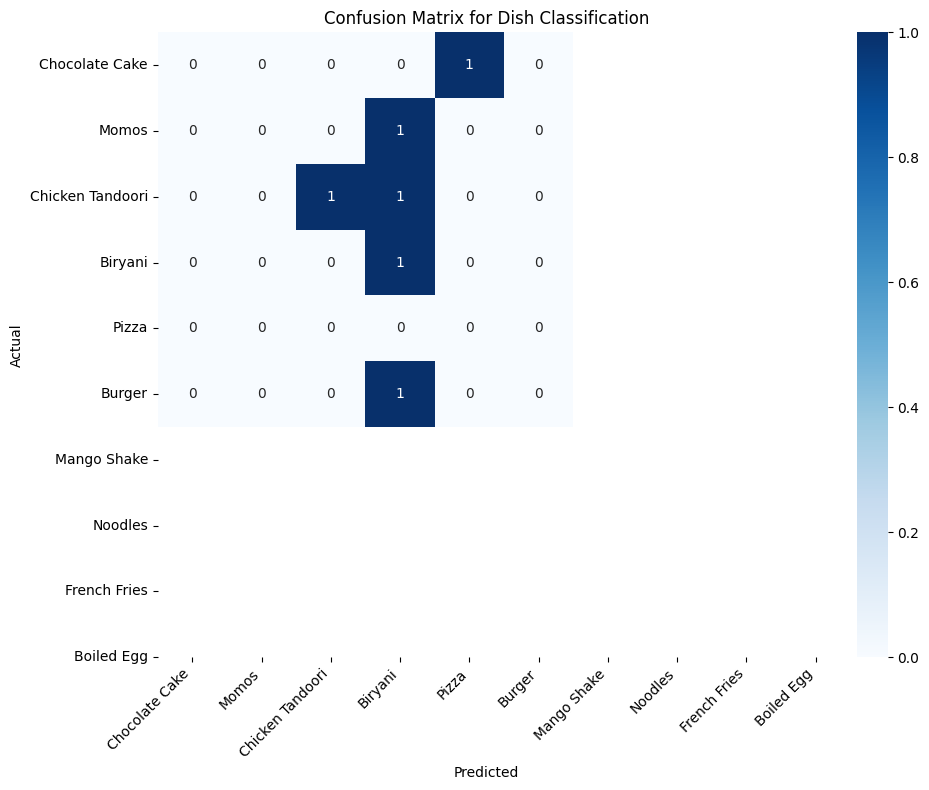


Macro-Averaged Metrics:
Precision (Macro): 0.21
Recall (Macro): 0.25
F1 Score (Macro): 0.18

ROC AUC (One-vs-Rest): nan


C:\Users\gauta\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\gauta\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\gauta\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\gauta\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\Users\gauta\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samp

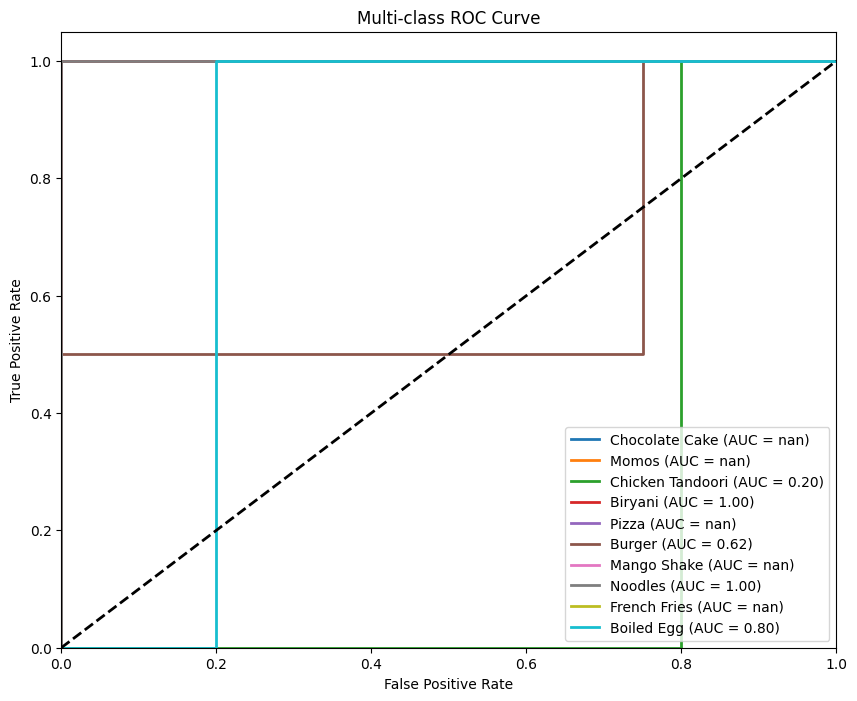

In [31]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Try importing required libraries and provide installation guidance if not found
try:
    import torch
    import torch.nn as nn
    from torchvision import models, transforms
    from torch.utils.data import Dataset, DataLoader, Subset
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
    from sklearn.preprocessing import label_binarize
    print("All required libraries are installed.")
except ModuleNotFoundError as e:
    print(f"Error: {e}")
    print("PyTorch or other required libraries are not installed. Please install them using:")
    print("pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu")
    print("pip install scikit-learn matplotlib seaborn pandas")
    print("After installation, restart your kernel or IDE if necessary.")
    exit(1)

# Custom Dataset for loading dish images
class DishDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.dish_to_idx = {dish: idx for idx, dish in enumerate(df['dish_name'].unique())}
        for _, row in df.iterrows():
            for col in ['image_1', 'image_2', 'image_3']:
                if col in df.columns and pd.notna(row[col]):
                    img_path = os.path.normpath(row[col]).replace('\\', '/')
                    if os.path.exists(img_path):
                        self.image_paths.append(img_path)
                        self.labels.append(self.dish_to_idx[row['dish_name']])
                    else:
                        print(f"Warning: Image path not found: {img_path}")
        print(f"Total valid images loaded: {len(self.image_paths)}")
        print(f"Class distribution: {np.bincount(self.labels) if self.labels else 'No labels'}")
        print(f"Loaded image paths (first 10 if available): {self.image_paths[:10]}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Utility function for safe dataset splitting
def safe_split_dataset(dataset, test_size=0.2, random_state=42, split_type="train_val"):
    if len(dataset) < 2:
        print(f"Dataset too small to split ({len(dataset)} samples). Using full dataset for training.")
        return dataset, Subset(dataset, [])
    
    indices = np.arange(len(dataset))
    labels = np.array(dataset.labels) if hasattr(dataset, 'labels') else None
    
    if labels is not None and len(np.unique(labels)) > 1:
        class_counts = np.bincount(labels)
        if np.min(class_counts[class_counts > 0]) < 2:
            print(f"Warning: Some classes have fewer than 2 samples. Falling back to non-stratified split for {split_type}.")
            train_idx, test_idx = train_test_split(indices, test_size=test_size, random_state=random_state)
        else:
            try:
                train_idx, test_idx = train_test_split(
                    indices, test_size=test_size, stratify=labels, random_state=random_state
                )
            except ValueError as e:
                print(f"Stratified split failed for {split_type}: {e}. Falling back to non-stratified split.")
                train_idx, test_idx = train_test_split(indices, test_size=test_size, random_state=random_state)
    else:
        print(f"No labels or single class for {split_type}. Using non-stratified split.")
        train_idx, test_idx = train_test_split(indices, test_size=test_size, random_state=random_state)
    
    train_subset = Subset(dataset, train_idx)
    test_subset = Subset(dataset, test_idx)
    print(f"{split_type.capitalize()} split - Train set size: {len(train_subset)}, Test/Validation set size: {len(test_subset)}")
    return train_subset, test_subset

# Recipe Generator Class with test_model method for performance metrics and ROC AUC
class RecipeGenerator:
    def __init__(self, dataframe):
        self.df = dataframe
        self.dish_names = dataframe['dish_name'].unique()
        self.model = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.test_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        self.idx_to_dish = {idx: dish for idx, dish in enumerate(self.dish_names)}

    def load_model(self, model_path='dish_classifier.pt'):
        """Load the trained model from a file."""
        if self.model is None:
            self.model = models.resnet18(weights=None)
            num_classes = len(self.dish_names)
            self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
            if os.path.exists(model_path):
                self.model.load_state_dict(torch.load(model_path, map_location=self.device))
                print(f"Model loaded from {model_path}")
            else:
                print(f"Warning: Model file {model_path} not found. Initialize a new model if training.")
            self.model = self.model.to(self.device)
            self.model.eval()
        return self.model

    def test_model(self, test_size=0.2, batch_size=4):
        """Evaluate the model on a test dataset with performance metrics and ROC AUC curve."""
        dataset = DishDataset(self.df, transform=self.test_transform)
        if len(dataset) == 0:
            print("No valid images found in dataset.")
            return
        
        _, test_subset = safe_split_dataset(dataset, test_size=test_size, random_state=42, split_type="test")
        if len(test_subset) == 0:
            print("Test set is empty due to small dataset size. Using full dataset for testing.")
            test_subset = dataset
        
        test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)
        self.load_model()
        
        all_preds = []
        all_labels = []
        all_probs = []
        correct = 0
        total = 0
        print("Evaluating model on test set...")
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self.model(images)
                probs = torch.softmax(outputs, dim=1)
                _, predicted = torch.max(probs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
        
        test_accuracy = 100 * correct / total if total > 0 else 0
        print(f"Test Accuracy: {test_accuracy:.2f}%")
        
        # Compute and display additional performance metrics if test set exists
        if total > 0:
            all_labels = np.array(all_labels)
            all_preds = np.array(all_preds)
            all_probs = np.array(all_probs)
            
            # Confusion Matrix
            cm = confusion_matrix(all_labels, all_preds)
            print("\nConfusion Matrix:")
            print(cm)
            
            # Visualize Confusion Matrix as a heatmap
            plt.figure(figsize=(10, 8))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                        xticklabels=[self.idx_to_dish[i] for i in range(len(self.dish_names))],
                        yticklabels=[self.idx_to_dish[i] for i in range(len(self.dish_names))])
            plt.title('Confusion Matrix for Dish Classification')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
            
            # Precision, Recall, F1 Score (macro-averaged)
            precision_macro = precision_score(all_labels, all_preds, average='macro', zero_division=0)
            recall_macro = recall_score(all_labels, all_preds, average='macro', zero_division=0)
            f1_macro = f1_score(all_labels, all_preds, average='macro', zero_division=0)
            print(f"\nMacro-Averaged Metrics:")
            print(f"Precision (Macro): {precision_macro:.2f}")
            print(f"Recall (Macro): {recall_macro:.2f}")
            print(f"F1 Score (Macro): {f1_macro:.2f}")
            
            # Calculate ROC AUC for multi-class (one-vs-rest)
            try:
                y_true_bin = label_binarize(all_labels, classes=range(len(self.dish_names)))
                roc_auc = roc_auc_score(y_true_bin, all_probs, multi_class='ovr')
                print(f"\nROC AUC (One-vs-Rest): {roc_auc:.2f}")
                
                # Plot ROC curve for each class
                plt.figure(figsize=(10, 8))
                for i in range(len(self.dish_names)):
                    fpr, tpr, _ = roc_curve(y_true_bin[:, i], all_probs[:, i])
                    roc_auc_class = auc(fpr, tpr)
                    plt.plot(fpr, tpr, lw=2, label=f'{self.idx_to_dish[i]} (AUC = {roc_auc_class:.2f})')
                plt.plot([0, 1], [0, 1], 'k--', lw=2)
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title('Multi-class ROC Curve')
                plt.legend(loc='lower right')
                plt.show()
            except Exception as e:
                print(f"\nROC AUC could not be computed: {e}")
        
        return test_accuracy

# Example usage with DataFrame
if __name__ == "__main__":
   

    generator = RecipeGenerator(df)
    
    # Test the model with performance metrics and ROC AUC
    generator.test_model(test_size=0.2, batch_size=4)
